# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary.

From a data science perspective, the task is to identify the primary factors influencing used car prices at the dealership. That requires translating this problem into a data problem by defining the target variable (used car prices) and identifying relevant features (e.g., year, odometer, model) that can be analyzed using statistical or machine learning models to predict pricing trends. The goal is to develop a predictive model that accurately captures the relationship between these features and the target variable.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

To become familiar with the dataset and identify any potential quality issues, I would follow these steps:

#### 1. **Initial Data Inspection**
   - **Load the dataset** to get a quick overview.
   - **Check for basic details** like number of rows and columns, column names, data types, and a few rows of data 
   - **Identify key variables**  which correspond to the business objectives (e.g., price, model, odometer, year).

#### 2. **Check for Missing Data**
   - **Assess missing values** by checking each column for NaNs or empty entries.
   - **Evaluate how significant** missing data is for each feature and whether it can be imputed or if rows/columns need to be removed.If the features have more than 50% or more NaNs will be a candidate for dropping from evaluation.

#### 3. **Assess Data Distribution**
   - **Examine categorical variables**, checking for possible imbalances in data representation.
   - **Visualize distributions** using histograms, lineplots, or scatter plots to detect outliers, skewness, or inconsistencies in the data.

#### 4. **Verify Data Completeness**
   - Confirm that the dataset contains enough data points to build a reliable model.

#### 5. **Categorical Feature Exploration**
   - **Understand categorical variables** like car make, model, fuel, type. drive, paint_color, there counts and their potential impact on car prices.

#### 6. **Identify Feature Correlations**
   - **Examine correlations** between numeric variables using a correlation matrix to spot potential multicollinearity or relationships that could inform model building.
   - **Understand categorical variables**  car manufacturer, model, fuel, paint_color and their potential impact on car prices.

#### 7. **Data Transformation Needs**
   - Do we need transformations (normalization, or scaling for numeric data).





In [8]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split, KFold, StratifiedKFold, ShuffleSplit, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.compose import make_column_transformer, TransformedTargetRegressor, make_column_selector, ColumnTransformer
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import SequentialFeatureSelector,SelectFromModel
from sklearn.metrics import mean_squared_error, get_scorer_names
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
import category_encoders as ce
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import warnings
import os
import import_ipynb
import CommonFunction as cf
import importlib
from sklearn import set_config
set_config(display="diagram")

warnings.filterwarnings('ignore')

importing Jupyter notebook from CommonFunction.ipynb


In [9]:
!pip install category_encoders
!pip install ipynb
!pip install import_ipynb


In [10]:
images_path = "./images/"
if not os.path.isdir(images_path):
    os.mkdir("./images") 

#rs = 42
## Dealership Sales has steadly increased since 2001 and so using that starting index
#sales_since = '2006-01-01'
figcounter = 0




In [11]:
used_cars_df = pd.read_csv('data/vehicles.csv')
all_cars_data_df = used_cars_df
#used_cars_df.info()


In [12]:
used_cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [13]:
used_cars_df.head(5)


,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [14]:
#Lets check the percentage of nulls in data 
cf.feature_null_percentage_in_data(used_cars_df)

id               0.00
region           0.00
price            0.00
year             0.28
manufacturer     4.13
model            1.24
condition       40.79
cylinders       41.62
fuel             0.71
odometer         1.03
title_status     1.93
transmission     0.60
VIN             37.73
drive           30.59
size            71.77
type            21.75
paint_color     30.50
state            0.00
dtype: float64


In [15]:
# WHat is the percentage of data we will loose if we drop all NaN's
cf.cleaned_data_percent(used_cars_df)
# We lose 90% of dataset. Don't think that is acceptable in the model, so will have do some data engg, but that is for later

91.83189655172413


#### Lets perform some data correlation, based on counts and get an understanding what sells at the dealership's and we can draw some anlaysis of data
- manufacturer
- cyclinders
- type
- paint_color
- fuel type
- title 

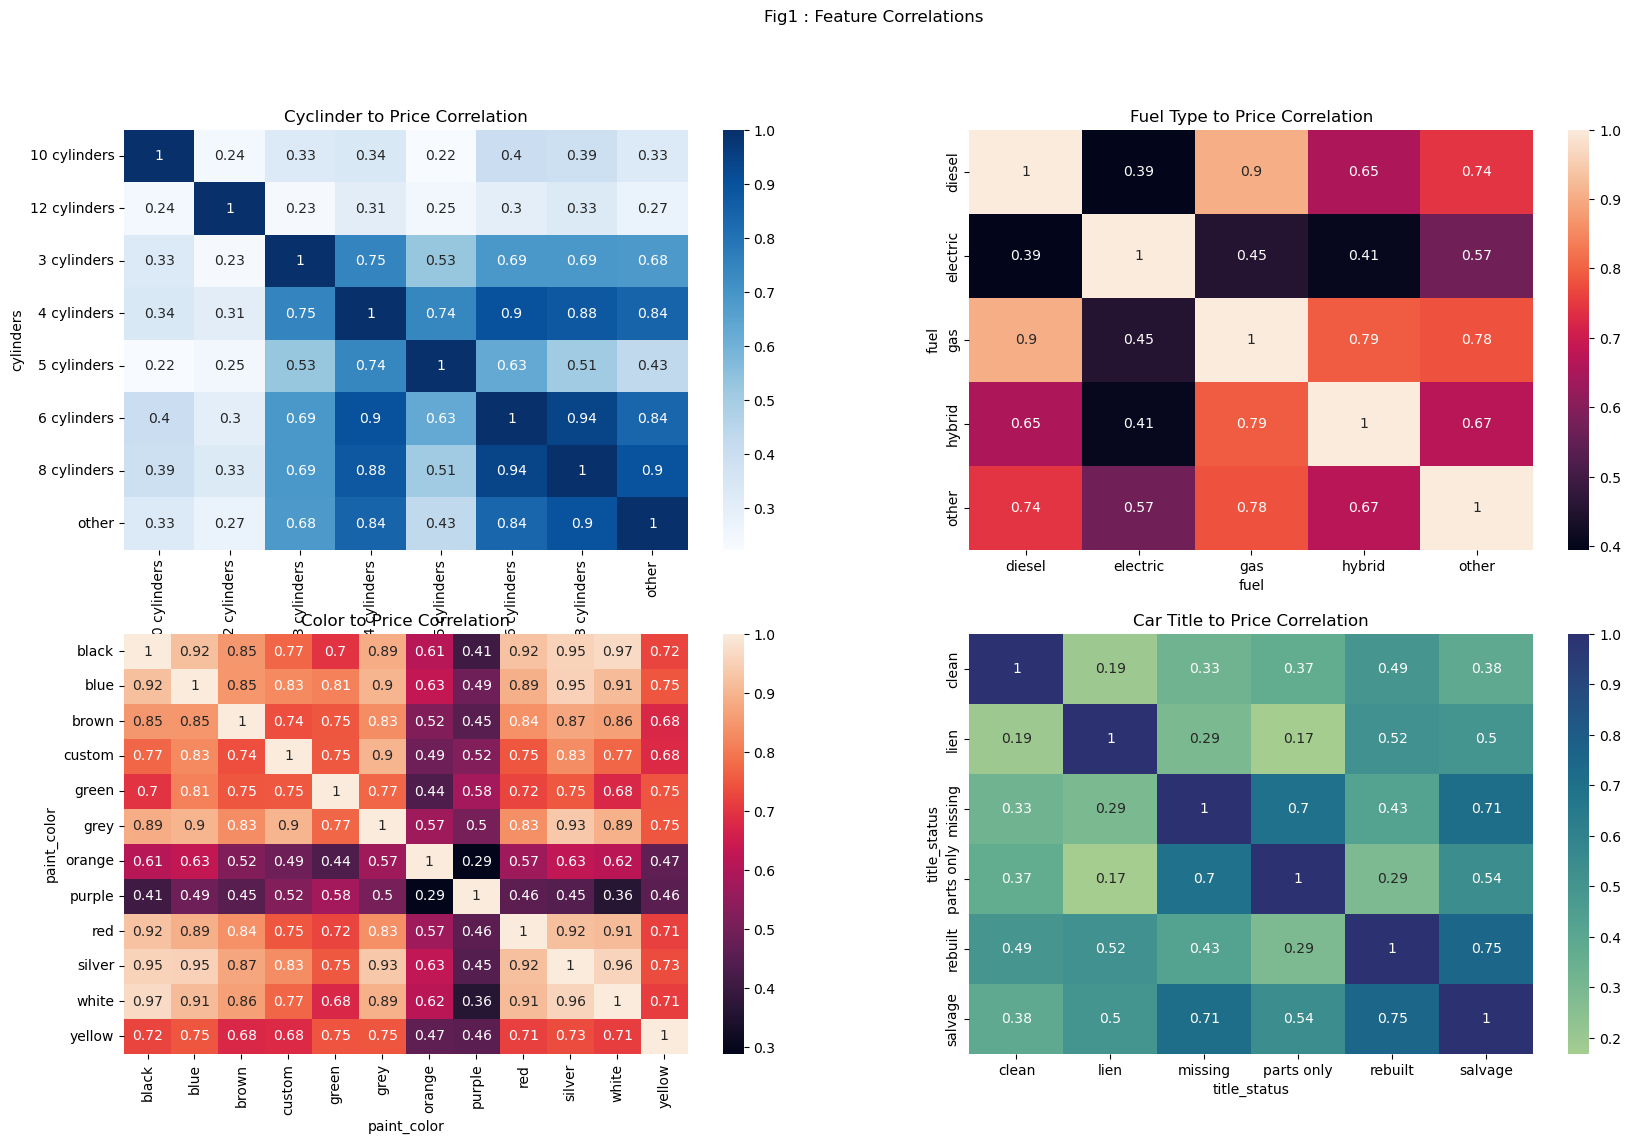

In [17]:
# Let's plot some data to understand price and feature correlations

palette = ["#fee090", "#fdae61", "#4575b4", "#313695", "#e0f3f8", "#abd9e9", "#d73027", "#a50026"]

fig, axs = plt.subplots(2, 2)
fig.set_figheight(12)
fig.set_figwidth(20)
corr_data_cycinder_sales = pd.crosstab(used_cars_df.price, used_cars_df.cylinders.sort_values()).corr()
#matrix = np.triu(corr_data)
sns.heatmap(corr_data_cycinder_sales, annot=True, cmap= 'Blues', ax=axs[0,0])
axs[0,0].set_title('Cyclinder to Price Correlation')
sns.heatmap(pd.crosstab(used_cars_df.price, used_cars_df.fuel.sort_values()).corr(), annot=True, ax=axs[0,1])
axs[0,1].set_title('Fuel Type to Price Correlation')
sns.heatmap(pd.crosstab(used_cars_df.price, used_cars_df.paint_color.sort_values()).corr(), annot=True, ax=axs[1,0])
axs[1,0].set_title('Color to Price Correlation')
sns.heatmap(pd.crosstab(used_cars_df.price, used_cars_df.title_status.sort_values()).corr(), annot=True, cmap= 'crest', ax=axs[1,1])
axs[1,1].set_title('Car Title to Price Correlation')

title, figcounter = cf.getFigTitle(figcounter, 'Feature Correlations')
fig.suptitle(title)
plt.savefig(images_path+title)
plt.show()

### This plot is taking for ever to be done ... convert to markdown for now

fig, axs = plt.subplots(1, 1)
fig.set_figheight(6)
fig.set_figwidth(20)

sns.heatmap(pd.crosstab(used_cars_df.price, used_cars_df.odometer.sort_values()).corr(), annot=True, ax=axs[2,1])
axs[2,1].set_title('Odometer Status to Price Correlation')
sns.heatmap(pd.crosstab(used_cars_df.price, used_cars_df.type.sort_values()).corr(), annot=True, cmap= 'Blues', ax=axs[2,2])
axs[2,2].set_title('Type to Price Correlation')
title, figcounter = cf.getFigTitle(figcounter, 'Feature Correlations 2')
fig.suptitle(title)
plt.savefig(images_path+title)
plt.show()

#### Current Hypothesis - Price has correlation to
- cycliners 
    - 4 /8 /other
- paint_color
    - black/white/silver cars
- title status
    - rebuilt cars fetch value
- feul
    - gas/diesel/other 

#### Since the sales have increased steadily since 2000, so decided to slice the data to get more understanding

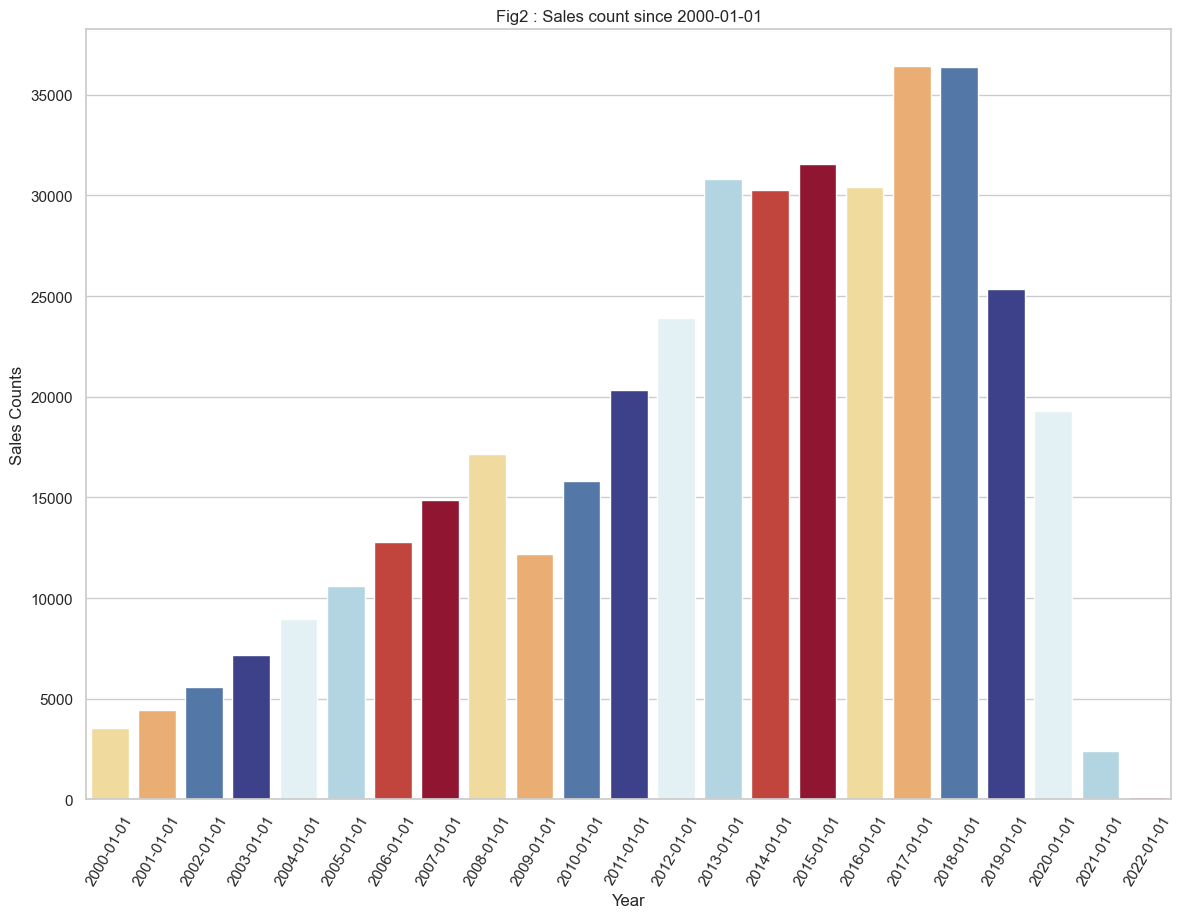

In [21]:
sales_since = '2000-01-01'

# Car sales based on years
plt.figure(figsize=(14,10))
year_df = used_cars_df.year.value_counts().to_frame().reset_index()
year_df.index = pd.to_datetime(year_df.year, format='%Y')
year_df = year_df.drop('year', axis=1)
sliced_year_df = year_df[sales_since:]
sliced_year_df.sort_index(inplace=True)
sns.set_theme(style="whitegrid")
ax = sns.barplot(sliced_year_df.reset_index(), x='year', y='count', palette=palette)
#sns.barplot(x=year_df.count, y=year_df.year,  orient='h')

#plt.bar_label(year_df.year, fontsize=14);
plt.xlabel('Year')
plt.xticks(rotation=60)
plt.ylabel("Sales Counts")
title, figcounter = cf.getFigTitle(figcounter, f'Sales count since {sales_since}')
plt.title(title)
plt.savefig(images_path+title)
plt.show()


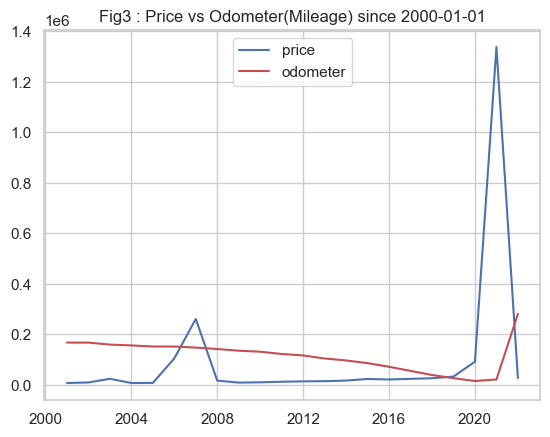

In [22]:
by_year_df = used_cars_df.copy()
by_year_df.index = pd.to_datetime(by_year_df.year, format='%Y')
by_year_df = by_year_df.drop('year', axis=1)
plot_price_by_year = by_year_df[sales_since:]
plot_price_by_year = plot_price_by_year.reset_index()[['year', 'price']].groupby('year').mean()[1:]
odometer_price_by_year = by_year_df[sales_since:].reset_index()[['year', 'odometer']].groupby('year').mean()[1:]

plt.plot(plot_price_by_year, "b-", label='price')
plt.plot(odometer_price_by_year, "r-", label='odometer')
leg = plt.legend(loc='upper center')
title, figcounter = cf.getFigTitle(figcounter, f'Price vs Odometer(Mileage) since {sales_since}')
plt.title(title)
plt.savefig(images_path+title)
plt.show()

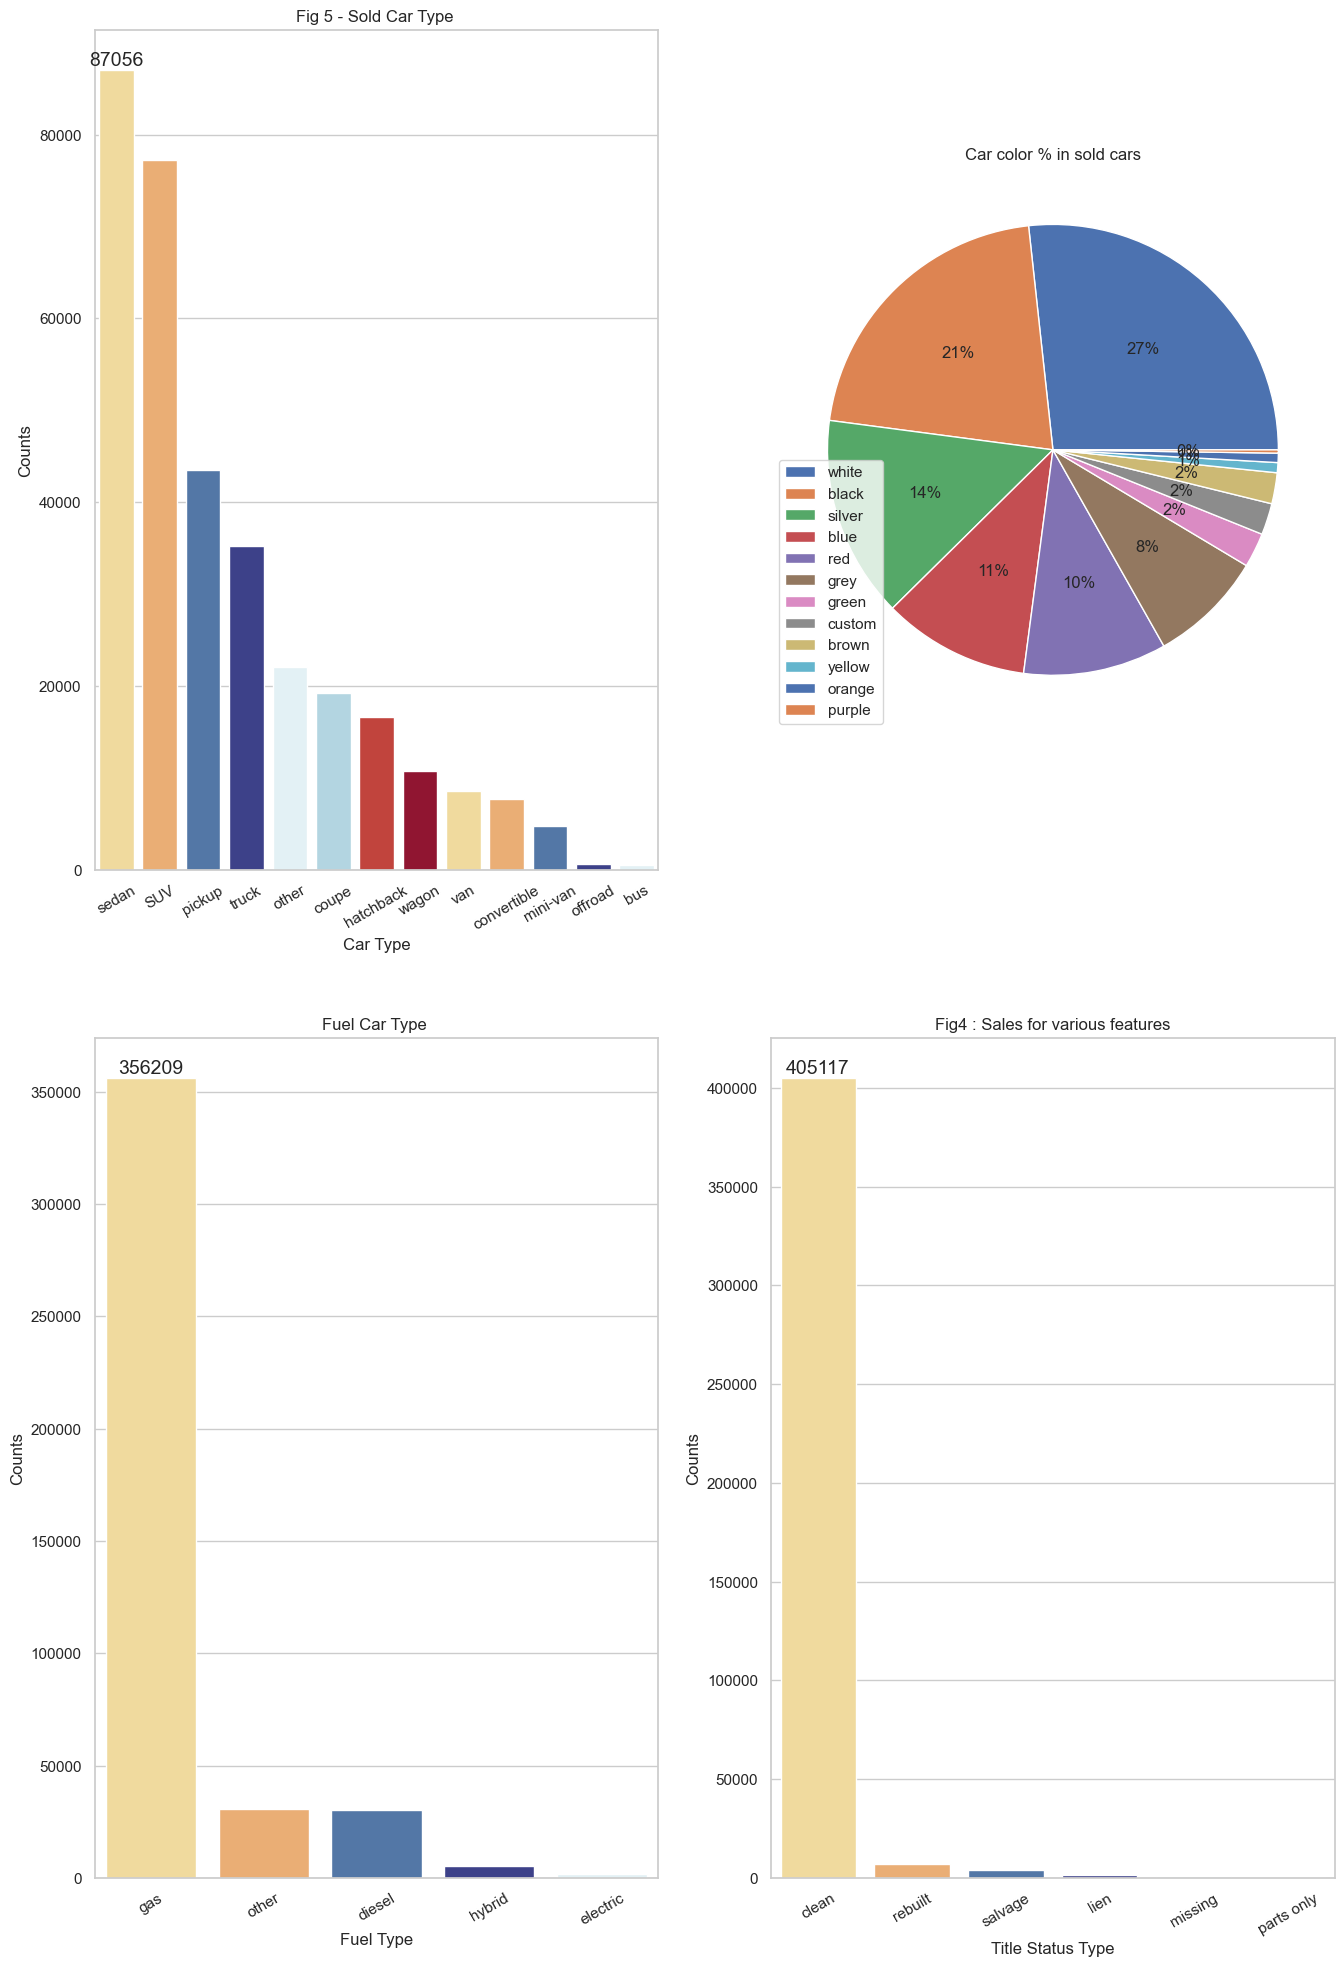

In [23]:
# Plot some bunch of features for distribution and counts of 

fig, axs = plt.subplots(2, 2)
fig.set_figheight(24)
fig.set_figwidth(16)
type_df = used_cars_df.type.value_counts().to_frame().reset_index()
sns.set_theme(style="whitegrid")
sns.barplot(type_df, x='type', y='count', ax=axs[0,0], palette=palette)
axs[0,0].bar_label(axs[0,0].containers[0], fontsize=14);
axs[0,0].set_xlabel("Car Type")
axs[0,0].tick_params(axis='x', rotation=30)
axs[0,0].set_ylabel("Counts")
axs[0,0].set_title('Fig 5 - Sold Car Type ') 

paint_colors_counts = used_cars_df.paint_color.value_counts()
axs[0,1].pie(paint_colors_counts, autopct='%1.0f%%')    
axs[0,1].legend(labels=paint_colors_counts.index)
axs[0,1].set_title('Car color % in sold cars')

fuel_df = used_cars_df.fuel.value_counts().to_frame().reset_index()
sns.set_theme(style="whitegrid")
sns.barplot(fuel_df, x='fuel', y='count', ax=axs[1,0], palette=palette)
axs[1,0].bar_label(axs[1,0].containers[0], fontsize=14);
axs[1,0].set_xlabel("Fuel Type")
axs[1,0].tick_params(axis='x', rotation=30)
axs[1,0].set_ylabel("Counts")
axs[1,0].set_title('Fuel Car Type ') 

title_status_df = used_cars_df.title_status.value_counts().to_frame().reset_index()
sns.set_theme(style="whitegrid")
sns.barplot(title_status_df, x='title_status', y='count', ax=axs[1,1], palette=palette)
axs[1,1].bar_label(axs[1,1].containers[0], fontsize=14);
axs[1,1].set_xlabel("Title Status Type")
axs[1,1].tick_params(axis='x', rotation=30)
axs[1,1].set_ylabel("Counts")
axs[1,1].set_title('Car Title Status Counts') 

title, figcounter = cf.getFigTitle(figcounter, 'Sales for various features')
plt.title(title)
plt.savefig(images_path+title)

plt.show()


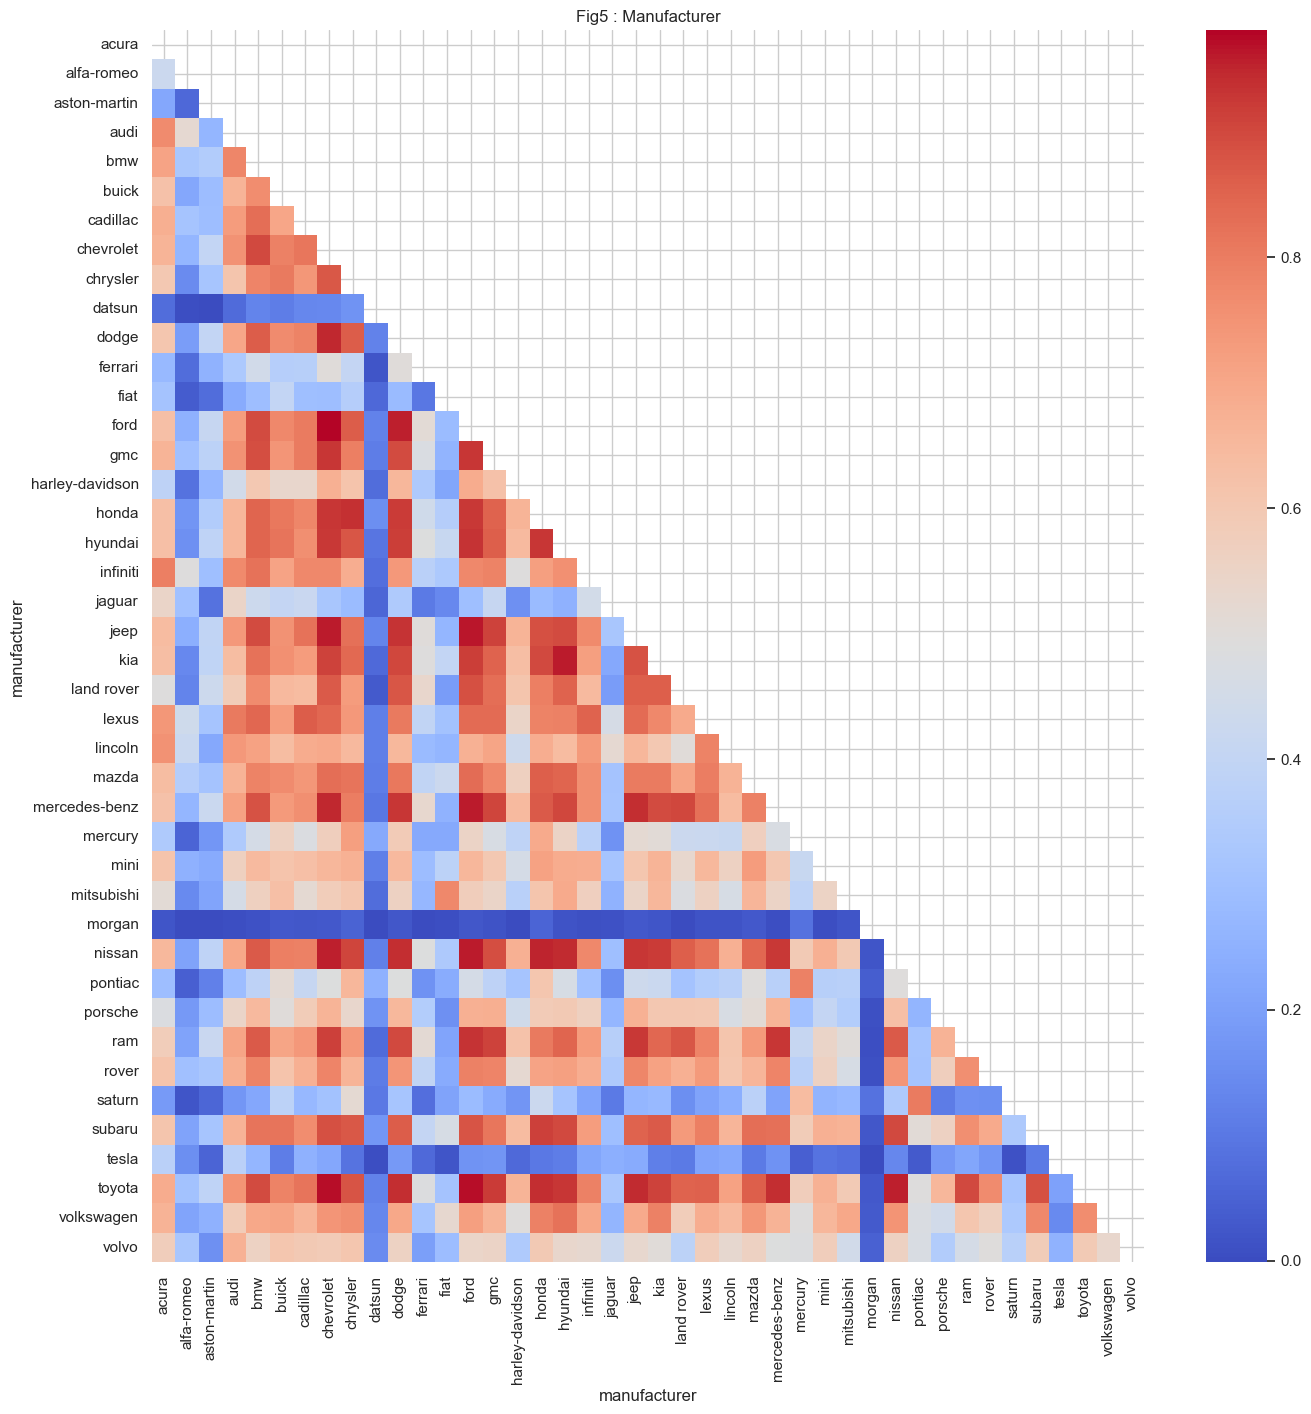

In [24]:
# Lets perform some data correlation, based on counts and get an understanding what sells

# Which manufacturer has correlation to sales
plt.figure(figsize=(16,16))
corr_data = pd.crosstab(used_cars_df.price, used_cars_df.manufacturer).corr()
matrix = np.triu(corr_data)
sns.heatmap(corr_data, cmap= 'coolwarm', mask=matrix)
title, figcounter = cf.getFigTitle(figcounter, 'Manufacturer')
plt.title(title)
plt.savefig(images_path+title)
plt.show()

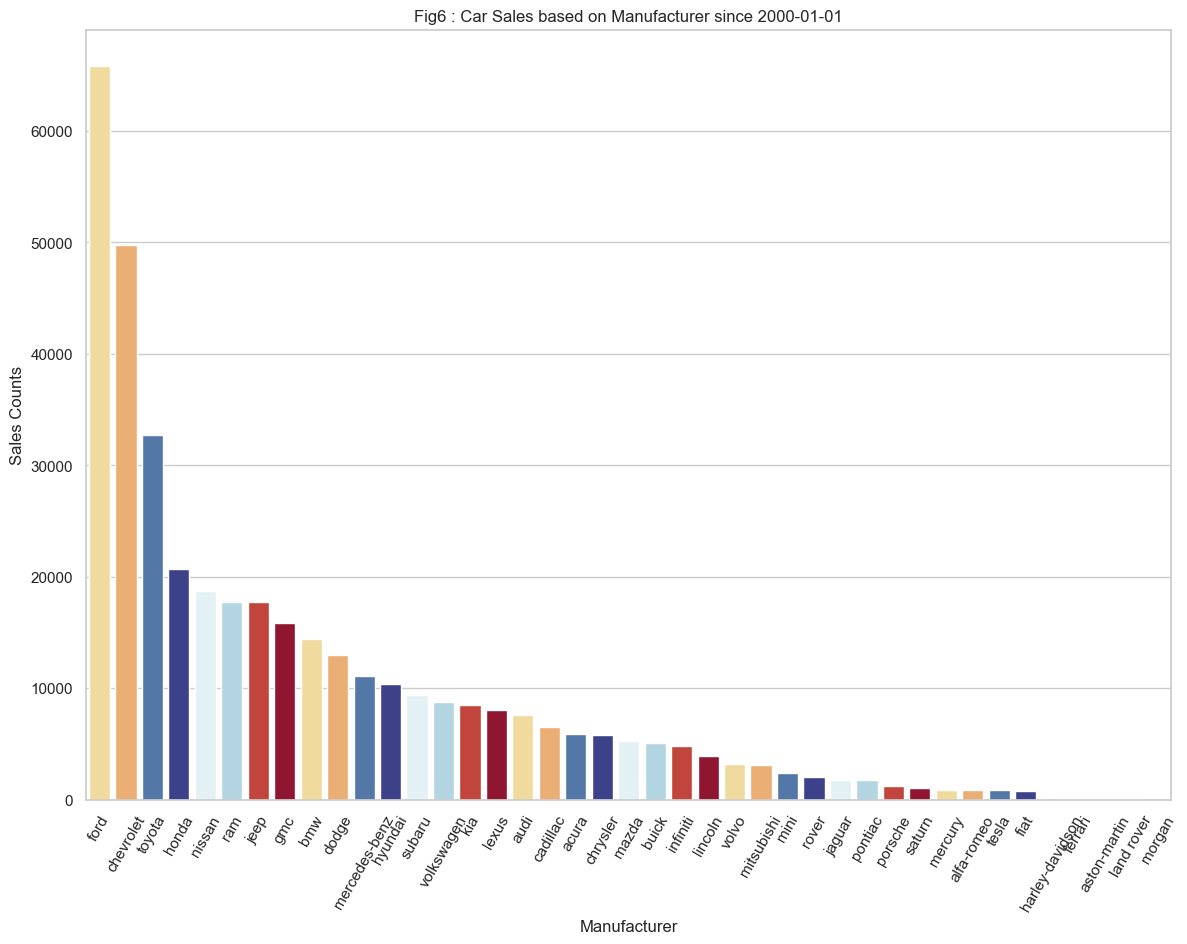

In [25]:
# Maufacturer's
plt.figure(figsize=(14,10))
manu_df = used_cars_df.reset_index()
manu_df.index = pd.to_datetime(manu_df.year, format='%Y')
sliced_year_df = manu_df[sales_since:]
manufacturer_df = sliced_year_df.manufacturer.value_counts().to_frame().reset_index()

manufacturer_df.sort_index(inplace=True)
sns.set_theme(style="whitegrid")
sns.barplot(manufacturer_df, x='manufacturer', y='count', palette=palette)
#sns.barplot(x=year_df.count, y=year_df.year,  orient='h')

#plt.bar_label(year_df.year, fontsize=14);
plt.xlabel('Manufacturer')
plt.xticks(rotation=60)
plt.ylabel("Sales Counts")

title, figcounter = cf.getFigTitle(figcounter, f'Car Sales based on Manufacturer since {sales_since}')
plt.title(title)
plt.savefig(images_path+title)
plt.show()


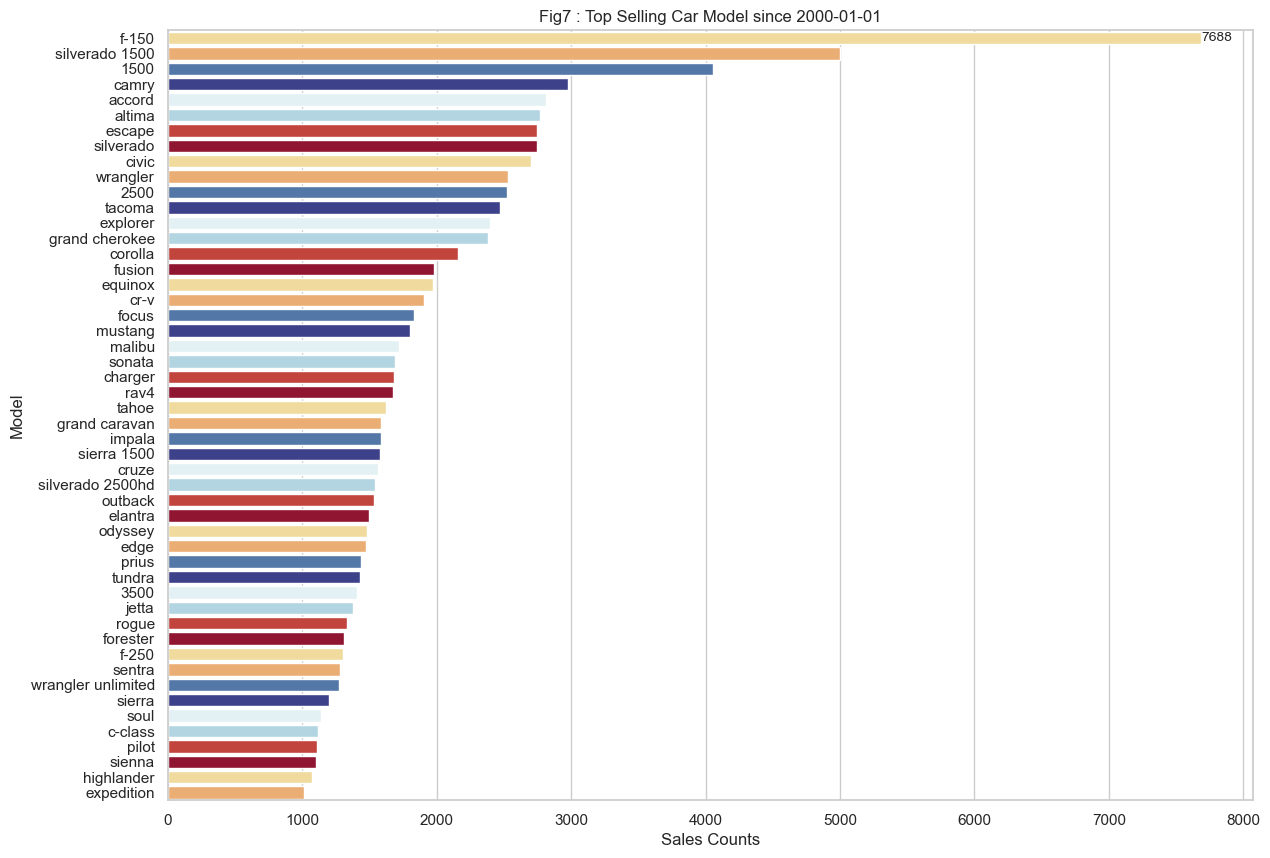

In [26]:
# Car models
plt.figure(figsize=(14,10))
model_df = used_cars_df.reset_index()
model_df.index = pd.to_datetime(model_df.year, format='%Y')
model_sliced_df = model_df[sales_since:].model.value_counts().to_frame().reset_index()[:50]

model_sliced_df.sort_index(inplace=True)
sns.set_theme(style="whitegrid")

ax = sns.barplot(data=model_sliced_df, y='model', x='count',  palette=palette)
ax.bar_label(ax.containers[0], fontsize=10);
plt.xlabel("Sales Counts")
plt.ylabel("Model")
title, figcounter = cf.getFigTitle(figcounter, f'Top Selling Car Model since {sales_since}')
plt.title(title)
plt.savefig(images_path+title)
plt.show()


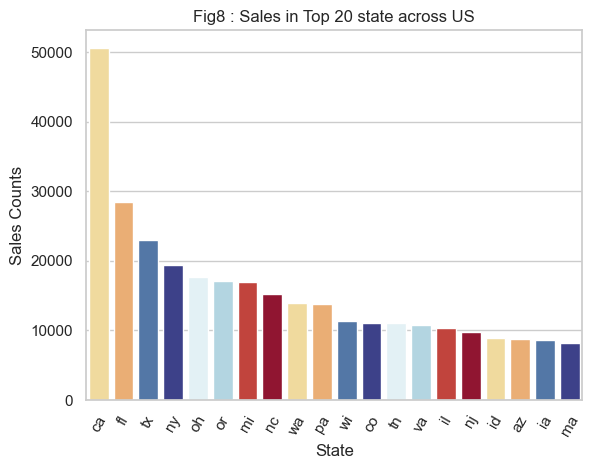

In [27]:
# Breakdown by top 20 states
number_states_to_show = 20
state_df = used_cars_df.state.value_counts().to_frame().reset_index()
sns.set_theme(style="whitegrid")
sns.barplot(state_df[:number_states_to_show], x='state', y='count', palette=palette)
plt.xlabel('State')
plt.xticks(rotation=60)
plt.ylabel("Sales Counts")
title, figcounter = cf.getFigTitle(figcounter,f'Sales in Top {number_states_to_show} state across US')
plt.title(title)
plt.savefig(images_path+title)

plt.show()


#### Current Hypothesis - Price has correlation to
- cycliners 
    - 4 /8 /other
- paint_color
    - black/white/silver cars
- title status
    - rebuilt cars fetch value
- fuel
    - gas/diesel/other
- manufacturer
    - ford
        - F150 model, escape 
    - Chevy
        - Silverado
    - Nissan Altima
    - toyota's sell more
- CA
    -  Max cars are sold there
      

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

#### Steps
- Clean the data to remove NaN's
- Perform bfill()/fill() to resolve soma NaN's
    - First level feature selection to see which features have 50% or more nulls and maybe candidates be dropped 
- Once data is 100% clear
- Pick an encoding technique - OneHotEncoder/CountEncoder
- Encode Data and to classify customers, in terms of
    - Price
    - Year/How many miles on car
    - Type of Car
    - Avg Selling price  

In [31]:
#Lets check the percentage of nulls in data 
cf.feature_null_percentage_in_data(used_cars_df)


id               0.00
region           0.00
price            0.00
year             0.28
manufacturer     4.13
model            1.24
condition       40.79
cylinders       41.62
fuel             0.71
odometer         1.03
title_status     1.93
transmission     0.60
VIN             37.73
drive           30.59
size            71.77
type            21.75
paint_color     30.50
state            0.00
dtype: float64


In [32]:
#Based on above - we can drop column size since it is has 71% missing
used_cars_df.drop(columns=['size'], inplace=True)

# Also feature ID, VIN can be dropped since they are unique values
used_cars_df.drop(columns=['VIN', 'id'],inplace=True)

# WHat is the percentage of data we will loose if we drop all NaN's
cf.cleaned_data_percent(used_cars_df)
# We lose 72% of dataset. Don't think that is acceptable in the model

72.82889805097452


In [33]:
cf.feature_null_percentage_in_data(used_cars_df)

region           0.00
price            0.00
year             0.28
manufacturer     4.13
model            1.24
condition       40.79
cylinders       41.62
fuel             0.71
odometer         1.03
title_status     1.93
transmission     0.60
drive           30.59
type            21.75
paint_color     30.50
state            0.00
dtype: float64


In [34]:
# Lets drop columns condition, since condition of a car is hard to predict
# Drive does not add any value 
#used_cars_df.drop(columns=['condition','drive'], inplace=True)
used_cars_df.drop(columns=['condition'], inplace=True)

In [35]:
### Lets do some data preparation to fill by grouping car based on manufacturer and model
used_cars_df.paint_color = used_cars_df.groupby(['manufacturer','model'])['paint_color'].fillna(method='ffill')
used_cars_df.paint_color = used_cars_df.groupby(['manufacturer','model'])['paint_color'].fillna(method='bfill')
used_cars_df.type = used_cars_df.groupby(['manufacturer','model'])['type'].fillna(method='ffill')
used_cars_df.type = used_cars_df.groupby(['manufacturer','model'])['type'].fillna(method='bfill')
used_cars_df.cylinders = used_cars_df.groupby(['manufacturer','model'])['cylinders'].fillna(method='ffill')
used_cars_df.cylinders = used_cars_df.groupby(['manufacturer','model'])['cylinders'].fillna(method='bfill')
used_cars_df.drive = used_cars_df.groupby(['manufacturer','model'])['drive'].fillna(method='ffill')
used_cars_df.drive = used_cars_df.groupby(['manufacturer','model'])['drive'].fillna(method='bfill')


In [36]:
# Lets validate the null percentages again
cf.feature_null_percentage_in_data(used_cars_df)

region          0.00
price           0.00
year            0.28
manufacturer    4.13
model           1.24
cylinders       6.02
fuel            0.71
odometer        1.03
title_status    1.93
transmission    0.60
drive           5.75
type            5.50
paint_color     5.63
state           0.00
dtype: float64


In [37]:
# Now we down to single digits in, so lets check what is the percentaage of data we will lose when we do drop 
cf.cleaned_data_percent(used_cars_df)

9.66758808095952


In [38]:
#It is 9%, which we can lose now, so lets go ahead and drop it
used_cars_df.dropna(inplace=True)

In [39]:
#Lets do a data check again if it clean or not
cf.feature_null_percentage_in_data(used_cars_df)

region          0.0
price           0.0
year            0.0
manufacturer    0.0
model           0.0
cylinders       0.0
fuel            0.0
odometer        0.0
title_status    0.0
transmission    0.0
drive           0.0
type            0.0
paint_color     0.0
state           0.0
dtype: float64


#### What type of encoding should be used for all the categorical data, choices are
- OnehotEncoder
- OrdinalEncoder
- CountEncoder

Based on the dataset want to preserve the count frequency for predicting sales price, since certain type of cars sells a whole lot, So trying with <b>CountEncoder</b>. OneHotEncoder will increase the cardinality of the dataset since the categorical columns have lot of unique values for Manufacturer. Model has 22K plus unique, so dropped that feature. 

NOTE: The other choice of encoder could be OrdinalEncoder that should help in controlling cardinality of data. Maybe for future eval
  

#### For a deep dive into data, we will look at car sales since 2016 now

In [42]:
#Since we using for the first time we test is before adding to pipelines for running multiple models
# Will be using Count Encoder, instead of OneHotEncoder 
#Will switch to timewindow of starting ... '2000-01-01'

sales_since = '2006-01-01'
print('Sales Since ', sales_since)
# We are close to 385 K records
model_df = used_cars_df.reset_index()
model_df.index = pd.to_datetime(model_df.year, format='%Y')
used_car_sliced_by_date_df = model_df[sales_since:]
used_car_sliced_by_date_df.index = used_car_sliced_by_date_df['index']
used_car_sliced_by_date_df.drop(columns='index', inplace=True)
used_car_sliced_by_date_df

#The function encodes/transformers and scales the data
used_cars_encoded_df = cf.count_encoder(used_car_sliced_by_date_df, cf.get_cat_features(used_car_sliced_by_date_df))

Sales Since  2006-01-01


In [43]:
print(used_car_sliced_by_date_df.shape)
print(used_cars_encoded_df.shape)


(329569, 14)
(329569, 14)


In [44]:
#used_cars_encoded_df = used_cars_encoded_df = convert_cat_to_codes(used_cars_df)
used_cars_encoded_df.head(1)

,price,year,odometer,region,manufacturer,model,cylinders,fuel,title_status,transmission,drive,type,paint_color,state
0,-0.000207,-0.034521,-0.220392,-1.854961,-0.526798,-0.432672,0.034814,0.444822,0.178862,-1.832683,0.807714,0.803824,-0.7874,-0.888999


#### Perform Classification to understand data more

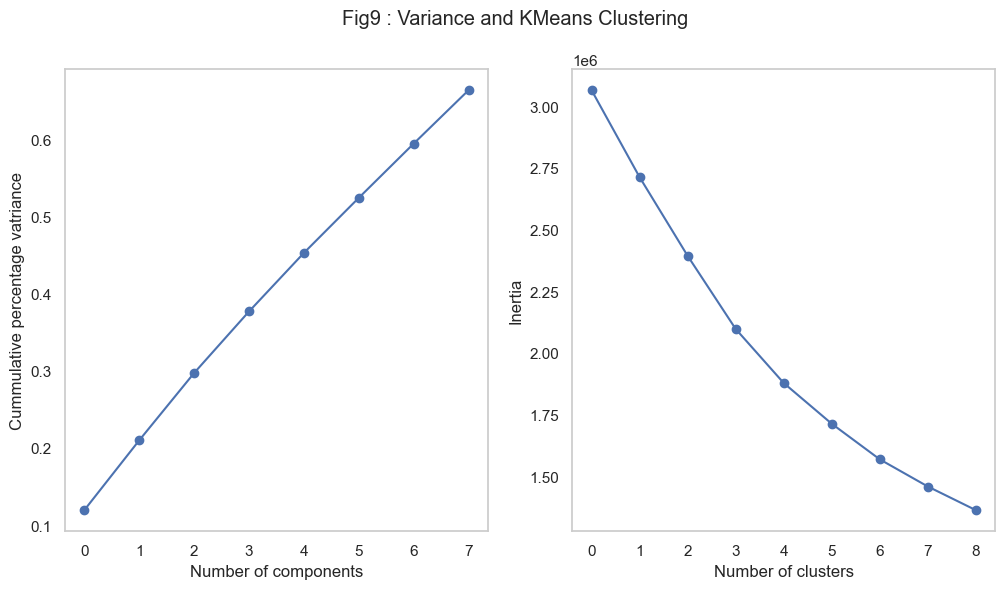

In [46]:

#scaler = StandardScaler()
#scaled_data = scaler.fit_transform(used_cars_encoded_df)

## Data is already scaled by the encode function above, so need to scale again
scaled_data = used_cars_encoded_df
#Since the data has 46 feature lets reduce the dimensions using PCA()
# We should find How many components we should have, for that we created the variance graph to find how many 
#components should be required to  capture 80%

pca = PCA(random_state=42)
pca.fit(scaled_data)
pca.explained_variance_ratio_

ratio = 0.7
pca_names = []
i = 0
# Lets select the components to capture 70 % variance
for cumratio in pca.explained_variance_ratio_.cumsum():
    if(0.7 < cumratio):
        break
    else:
        pca_names.append(f'pca{i}')
        i = i+1

#var_comp(pca.explained_variance_ratio_.cumsum(), 0.7)
pca = PCA(n_components=len(pca_names), random_state=42)

#fit the data
pca.fit(scaled_data)

#Calculate the component scores 
pca_scores = pca.transform(scaled_data)
inertia = []
for i in range(1,10):
    kmeans_pca = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans_pca.fit(pca_scores)
    inertia.append(kmeans_pca.inertia_)

#Plot the variance 
fig, axs = plt.subplots(1,2, figsize=(12,6))

axs[0].plot(pca.explained_variance_ratio_.cumsum(), marker='o')
axs[0].set_xlabel('Number of components')
axs[0].set_ylabel('Cummulative percentage vatriance')
axs[0].grid()

#Lets plot the inertia data to fidn the num of clustets needed
axs[1].plot(inertia, marker='o')
axs[1].set_xlabel('Number of clusters')
axs[1].set_ylabel('Inertia')
axs[1].grid()


title, figcounter = cf.getFigTitle(figcounter,'Variance and KMeans Clustering')
fig.suptitle(title)
fig.savefig(images_path+title)
plt.show()


In [47]:
#predicted_clusters = DBSCAN(eps=3, min_samples=2).fit(used_cars_encoded_df)

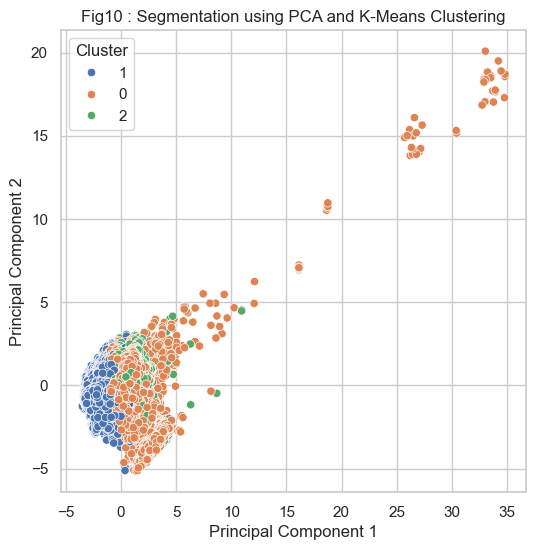

In [48]:
# We need 3 clusters 
kmeans_pca = KMeans(n_clusters=3 ,init='k-means++', random_state=42)
predicted_clusters= kmeans_pca.fit_predict(pca_scores)
df_pca_kmeans_clusters = pd.concat([used_cars_encoded_df.reset_index(drop=True), pd.DataFrame(data=pca_scores, columns=pca_names)], axis=1) 
df_pca_kmeans_clusters['clusters'] = predicted_clusters
# Create a DataFrame for plotting
plot_df = pd.DataFrame({
    'x': df_pca_kmeans_clusters.pca0,
    'y': df_pca_kmeans_clusters.pca1,
    'Cluster': predicted_clusters.astype(str)  # Convert cluster labels to strings for color encoding
})

# Create a scatter plot using Seaborn
plt.figure(figsize=(6, 6))
sns.scatterplot(data=plot_df, x='x', y='y', hue='Cluster')
title, figcounter = cf.getFigTitle(figcounter,'Segmentation using PCA and K-Means Clustering')
plt.title(title)
plt.savefig(images_path+title)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show();


In [49]:
used_cars_df_clusters = used_car_sliced_by_date_df
used_cars_df_encoded_clusters = used_cars_encoded_df

used_cars_df_clusters['clusters'] = predicted_clusters
used_cars_df_encoded_clusters['clusters'] = predicted_clusters
#print(used_cars_df_clusters.shape)
#print(used_cars_df_encoded_clusters.shape)


In [50]:
print(round(used_cars_df_clusters.groupby('clusters')['price'].mean()),0)
print(round(used_cars_df_clusters.groupby('clusters')['odometer'].mean()))
print(round(used_cars_df_clusters.groupby('clusters')['year'].mean()))

clusters
0    33406.0
1    40676.0
2    15341.0
Name: price, dtype: float64 0
clusters
0    100384.0
1     51885.0
2     84485.0
Name: odometer, dtype: float64
clusters
0    2013.0
1    2016.0
2    2014.0
Name: year, dtype: float64


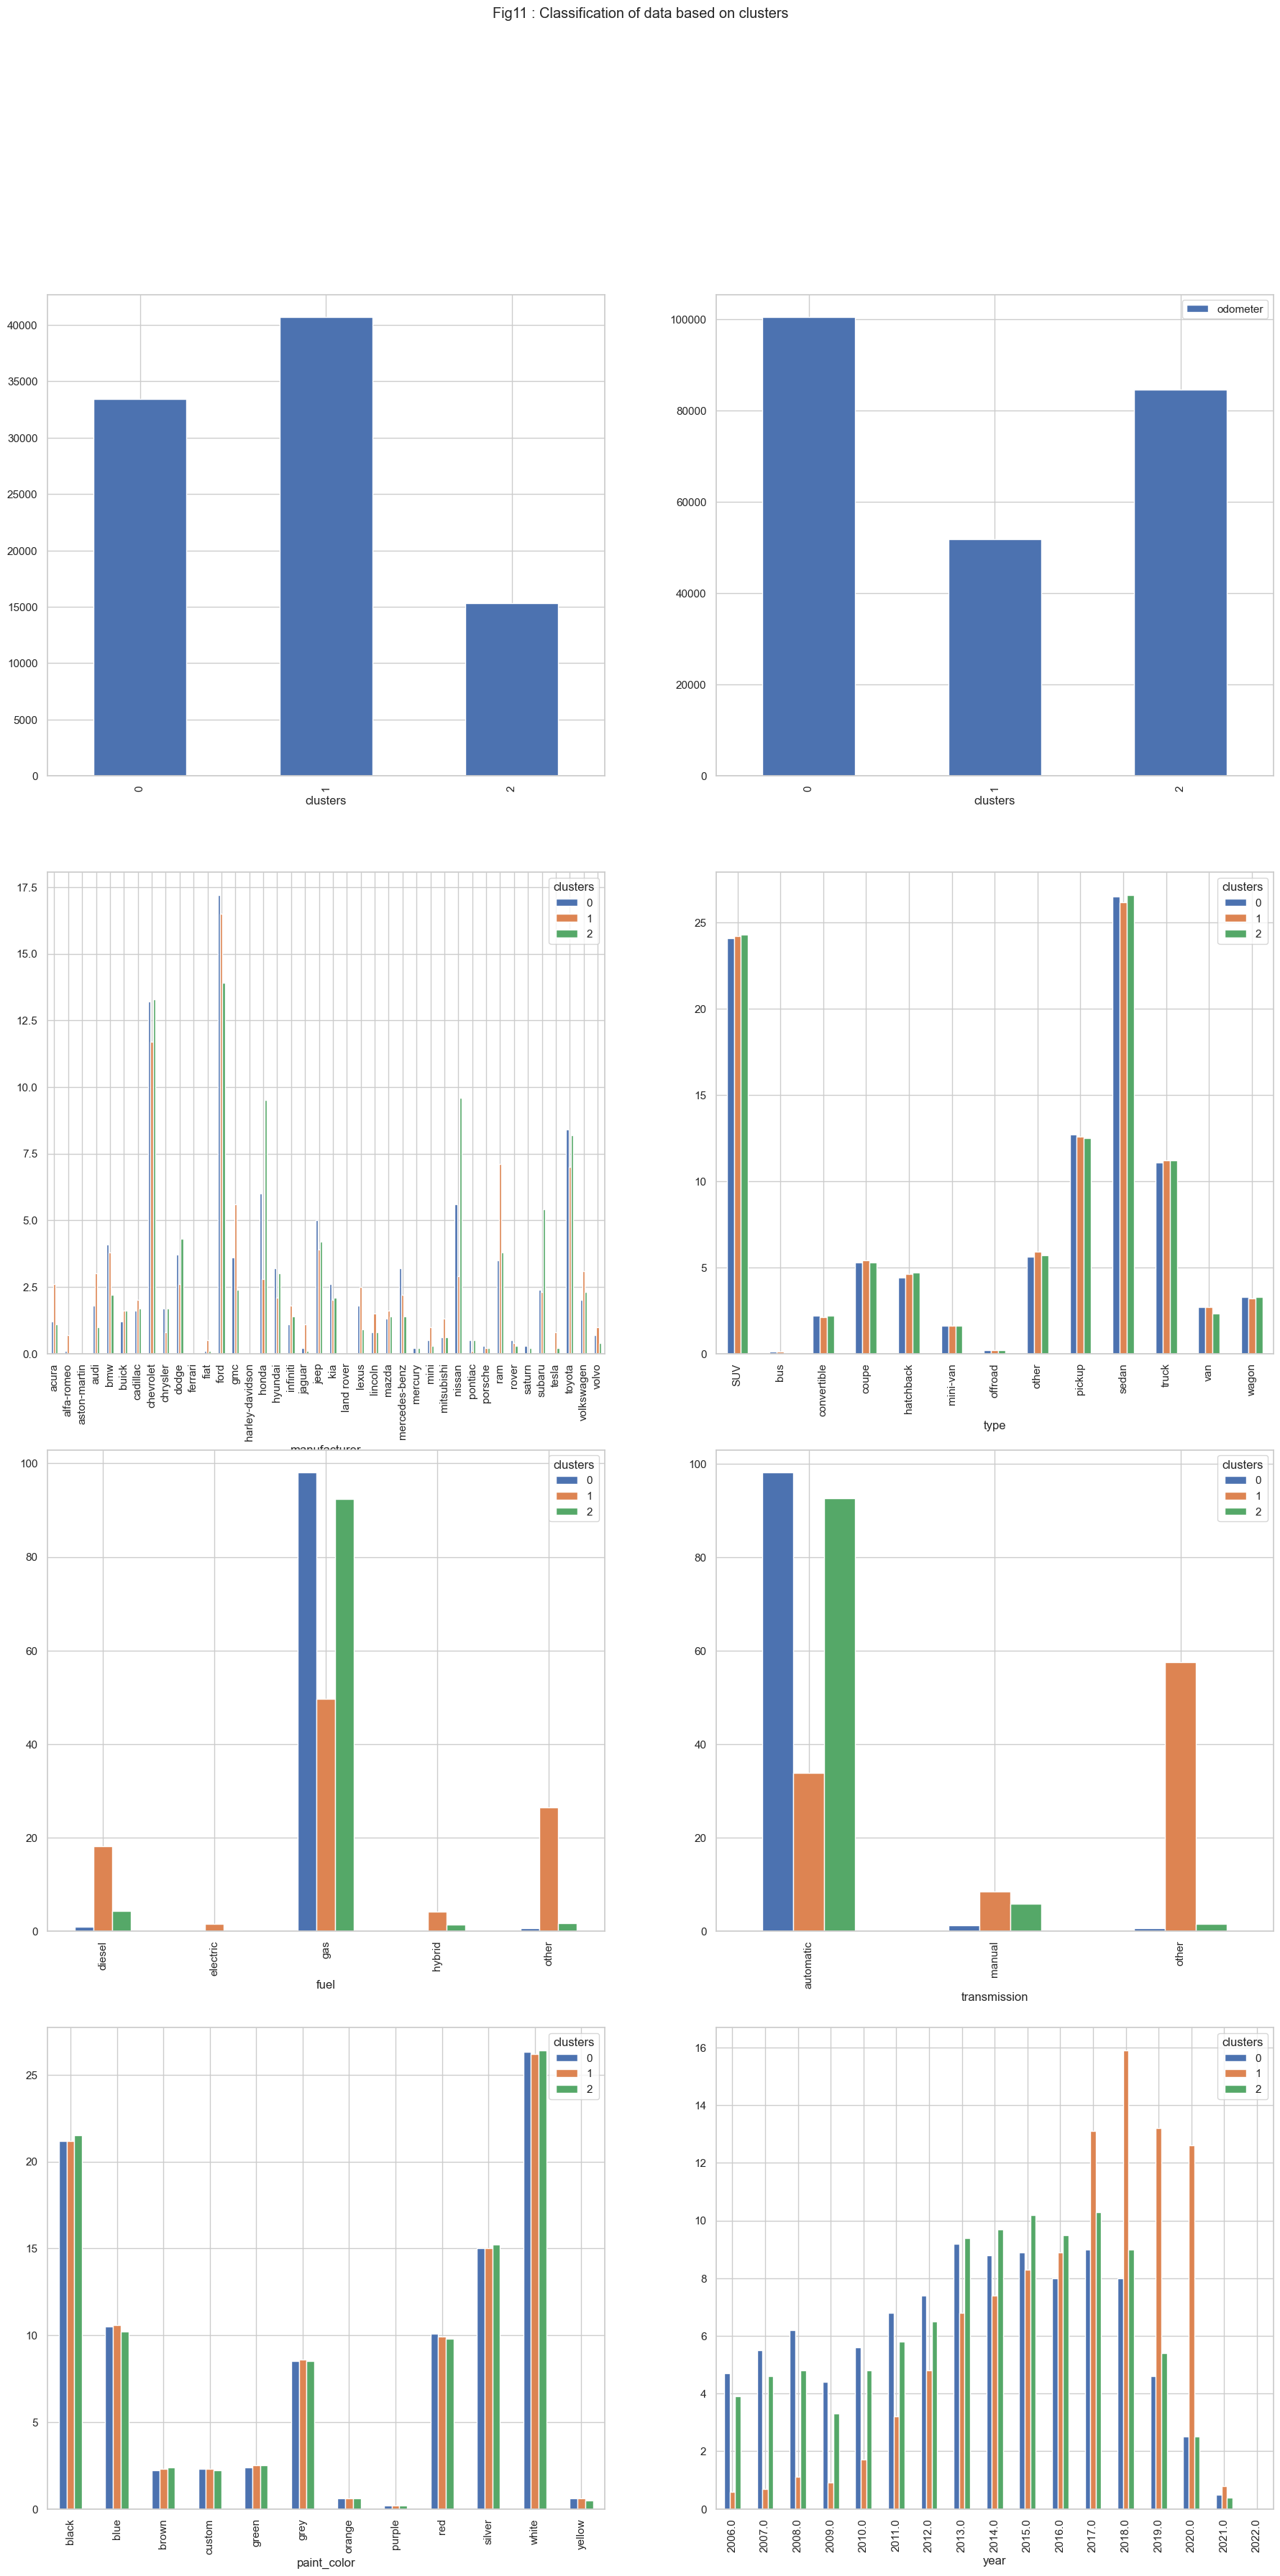

In [51]:
# Plotting of some metrics from classification

fig, axs = plt.subplots(4, 2)
fig.set_figheight(40)
fig.set_figwidth(22)
round(used_cars_df_clusters.groupby('clusters')['price'].mean()).plot.bar(ax=axs[0,0])
round(used_cars_df_clusters.groupby('clusters')[['odometer']].mean()).plot.bar(ax=axs[0,1])
used_cars_df_clusters.groupby('clusters')[['manufacturer']].value_counts(normalize=True).mul(100).round(1).unstack(0).plot.bar(ax=axs[1,0])
used_cars_df_clusters.groupby('clusters')[['type']].value_counts(normalize=True).mul(100).round(1).unstack(0).plot.bar(ax=axs[1,1])
used_cars_df_clusters.groupby('clusters')[['fuel']].value_counts(normalize=True).mul(100).round(1).unstack(0).plot.bar(ax=axs[2,0])
used_cars_df_clusters.groupby('clusters')[['transmission']].value_counts(normalize=True).mul(100).round(1).unstack(0).plot.bar(ax=axs[2,1])
used_cars_df_clusters.groupby('clusters')[['paint_color']].value_counts(normalize=True).mul(100).round(1).unstack(0).plot.bar(ax=axs[3,0])
used_cars_df_clusters.groupby('clusters')[['year']].value_counts(normalize=True).mul(100).round(1).unstack(0).plot.bar(ax=axs[3,1])
title, figcounter = cf.getFigTitle(figcounter,'Classification of data based on clusters')
fig.suptitle(title)
fig.savefig(images_path+title)
fig.show()


#### Cluster 0 - Medium Priced cars - Price Avg - $33K/High Mileage/2013
- odometer
    - 101 K
- Year
    - Sales have been declining in this category since 2017
- Fuel
    - Gas
- Manufacturer(Top Selllers)
    - Nissan
    - GMC
    - Toyota
    - Old Luxury
        - Benz
        - BMW 
- Title
    - Clean
- Transmission 
    - Automatic
- Type
    - Sedan
    - SUV
    - Pickup
    - Truck  
- Paint 
    - White
    - Black
    - Silver

#### Cluster 2 - Low Priced cars -  Avg - $15K/Medium Mileage/2014
- Best Sellers  2013 - 2017
- odometer
    - 84 K
- Year
    - Sales have been declining in this category since 2017
- Fuel
    - Gas
    - Other
- Manufacturer
    - ford - 
    - chevrolet -
    - Totyota/Nissan/Honda's
- Title
    - Clean
- Transmission 
    - Gas   
- Type - Sedan/SUV were 50% of sales
    - Sedan
    - SUV
    - Pickup  
- Paint 
    - White
    - Black
    - Silver
    - Blue
    - Red
    - Grey

#### Cluster 1 - High Priced - Price Avg - $40K/Low Mileage/2016 
- odometer
    - 40 K
- Year
    - Has been top sellers since 2017 > 
- Fuel
    - Gas
- Manufacturer
    - Toyota/Nissan/Honda
    - Ford
    - Chevy
- Title
    - Clean
- Transmission 
    - Other
        - More than 60% of cars
    - Gas 
- Type
    - Sedan
    - SUV
- Paint 
    - White
    - Black
    - Silver


In [53]:
print(used_cars_df.manufacturer.unique().size)
print(used_cars_df.state.unique().size)
#print(used_cars_df.region.unique().size)
print(used_cars_df.model.unique().size)


41
51
21757


In [54]:
# Although the  model which can be important feature has 21769 unique values, so will drop for now
used_cars_df.drop(columns=['model'], inplace=True)

## Remove te clusters added by Classification/PCA 
used_car_sliced_by_date_df.drop(columns=['clusters'], inplace=True)

In [55]:
# We are close to 
print(used_cars_df.shape)


(385611, 13)


In [56]:
# After slice we still have 373K of data
print(used_car_sliced_by_date_df.shape)

(329569, 14)


#### Now we want to do basic correlation of Price to feature, this might help in feature selection and validate the results of out modeling to compare any hypothesis


In [58]:
used_cars_df_encoded = cf.count_encoder(used_car_sliced_by_date_df, cf.get_cat_features(used_car_sliced_by_date_df))
used_cars_df_encoded

,price,year,odometer,region,manufacturer,model,cylinders,fuel,title_status,transmission,drive,type,paint_color,state
0,-0.000207,-0.034521,-0.220392,-1.854961,-0.526798,-0.432672,0.034814,0.444822,0.178862,-1.832683,0.807714,0.803824,-0.787400,-0.888999
1,-0.001810,-1.056948,-0.113890,-1.854961,1.020097,3.004415,0.841348,0.444822,0.178862,-1.832683,-1.924591,-0.606367,1.227622,-0.888999
2,0.000667,1.499120,-0.530653,-1.854961,1.020097,-0.220272,0.034814,0.444822,0.178862,-1.832683,0.046290,1.055138,1.227622,-0.888999
3,-0.000586,0.732299,-0.354852,-1.854961,0.160555,-0.356932,0.841348,0.444822,0.178862,-1.832683,0.046290,0.803824,1.227622,-0.888999
4,-0.002916,-0.290128,0.340508,-1.854961,1.747128,-0.269667,-0.811498,0.444822,0.178862,0.515605,0.807714,-0.606367,0.581506,-0.888999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329564,-0.001664,1.243513,-0.426072,-1.462277,-0.385192,-0.601439,0.034814,0.444822,0.178862,-1.832683,0.046290,1.055138,0.581506,-1.229379
329565,-0.000644,1.499120,-0.587730,-1.462277,-1.124131,-0.575095,-0.811498,0.444822,0.178862,-1.832683,0.807714,-0.606367,-0.849554,-1.229379
329566,-0.000003,1.499120,-0.650602,-1.462277,-0.958275,-0.316593,0.841348,-2.264564,0.178862,-1.832683,0.046290,-1.527335,-0.787400,-1.229379
329567,-0.000877,0.987906,-0.442993,-1.462277,-0.904360,-0.470542,0.841348,0.444822,0.178862,-1.832683,0.046290,-1.582868,1.227622,-1.229379


In [59]:
price_corr = used_cars_df_encoded.corrwith(used_cars_df_encoded["price"]).sort_values(ascending=False)
price_corr.head(50)
#sns.heatmap(used_cars_df_encoded, annot=True, cmap= 'Blues')


price           1.000000
drive           0.001261
odometer        0.001083
region          0.000928
title_status    0.000513
model           0.000031
type           -0.000150
manufacturer   -0.000166
state          -0.000531
paint_color    -0.000596
transmission   -0.000879
fuel           -0.000978
cylinders      -0.001376
year           -0.003167
dtype: float64

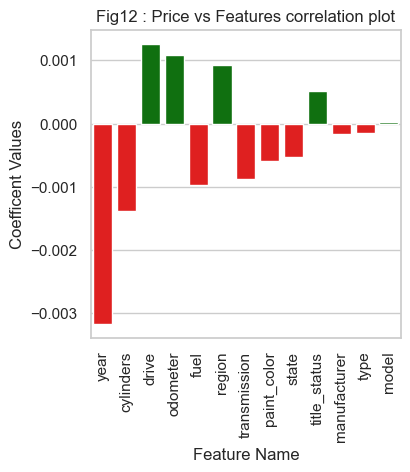

In [60]:
# Plot coef
plot_price_corr_df = pd.DataFrame(price_corr.drop('price'), columns=['corrcoefs']).reset_index()
plot_price_corr_df = plot_price_corr_df.rename({'index':'feature'}, axis='columns')
plot_price_corr_df['abs_corr'] = plot_price_corr_df['corrcoefs'].apply(lambda x: abs(x))
plot_price_corr_df['colors'] = plot_price_corr_df['corrcoefs'].apply(lambda x: "green" if x > 0 else "red")
plot_price_corr_df = plot_price_corr_df.sort_values("abs_corr", ascending=False).reset_index()
plot_price_corr_df

fig, ax = plt.subplots(1, 1, figsize=(4, 4))
sns.barplot(x='feature',
            y='corrcoefs',
            data=plot_price_corr_df, palette=np.array(plot_price_corr_df['colors']))
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
title, figcounter = cf.getFigTitle(figcounter,'Price vs Features correlation plot')
ax.set_title(title)
ax.set_ylabel('Coefficent Values')
ax.set_xlabel('Feature Name')
fig.savefig(images_path+title)
fig.show()


In [61]:
#used_cars_df_encoded.to_csv('data_encoded.csv')

#### Intersting observation but different from above correlation, price seems to be +ve correlation to 
- Odometer
- Drive 
- title_status

These findings are different from what we interpreted from classification, were expecting
- manufacturer
- year - Strong -ve correlated - Does it older the vehicle, will have lot of miles on vehicle 
- paint_color - Color is not a choice factor to a whole lot
- state - Where you sell does not matter

#### But one thing we can interpret that features could be included in model
- odometer
- year


### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

#### Approach
For every model approach capture
- MSE
- Score with various techiniques
    -  Holdout
    -  Kfold
    -  StratKfold
    -  ShuffleSplit
    -  Did not try (LeaveLastOut)
- Coefficents
  
1. Linear Regression() - 
    - Start with basic regression pipeline
    - Use Ridge()
        - gridSearch for the best alpha
    - Lasso()
    - SequentialFeatureSelector with and without Lasso()
        - Find hyperparam - n_features_to_select 
    - Find and run pipeline with best hyperparams
        - alpha
        - n_features_to_select
        - Capture coefficents
1. Polynomial Feature Transformation 
    - GridSearch for best degree   
    - Use Ridge()
        - gridSearch for the best alpha
    - SequentialFeatureSelector with and without Lasso()
    - Find and run pipeline with best hyperparams
        - degree
        - alpha
        - n_features_to_select
        - Capture coefficents

Plot the MSE's and make recommendation

#### Before we get to run in pipeline, wanted to run a Linear Regression model(For baselining)
- We need to encode
- Scale
- Predict using LinearRegression and capture MSE/Score. This will act as baseline before we run multiple pipelines
- We gona start with 11 features ( too high ????? )

In [66]:
## Lets go to modeling now
X,y = cf.getX_Y(used_car_sliced_by_date_df)
print(X.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print('X_train.shape = ', X_train.shape)
print('X_test.shape  = ', X_test.shape)

(329569, 13)
X_train.shape =  (230698, 13)
X_test.shape  =  (98871, 13)


In [67]:
linreg = LinearRegression(fit_intercept=False)
X_train_encoded = cf.count_encoder(X_train, cf.get_cat_features(X_train))
X_test_encoded = cf.count_encoder(X_test, cf.get_cat_features(X_test))
linreg.fit(X_train_encoded, y_train)
print('Train MSE : ', round(mean_squared_error(y_train, linreg.predict(X_train_encoded)), 4)) 
print('Test MSE : ', round(mean_squared_error(y_test, linreg.predict(X_test_encoded)), 4)) 
print('Train Score ', linreg.score(X_train_encoded, y_train))
print('Test Score ', linreg.score(X_test_encoded, y_test))
print(linreg.coef_)
print(linreg.get_params(deep=True))

#plt.scatter(used_cars_df_encoded, x='odometer', y='price')

Train MSE :  67283730276014.42
Test MSE :  3574236083.0367
Train Score  4.544240953863188e-06
Test Score  -3.7117194249773746
[-37626.26309154   2611.82697655   9986.93739291  -2647.80765989
   3879.21071569 -13926.56527898 -10641.59440832   4250.21397204
 -15915.62693223  13203.18129532  -1681.47231642  -5968.99404756
  -6225.44471711]
{'copy_X': True, 'fit_intercept': False, 'n_jobs': None, 'positive': False}


In [68]:
kfold = KFold(n_splits=5)
skfold = StratifiedKFold(n_splits=5, shuffle=True)
ss = ShuffleSplit(n_splits=20, train_size=.4, test_size=.3)
kfold_score = cross_val_score(linreg, X_train_encoded, y_train, cv=kfold, scoring='neg_mean_squared_error')
min_score = kfold_score.min()
scorer = 'KFold'
print("KFold: ", kfold_score, min_score)
strat_kfold_score = cross_val_score(linreg, X_train_encoded, y_train, cv=skfold)
print("StratifiedKFold:", strat_kfold_score, strat_kfold_score.min())
if(strat_kfold_score.min() < min_score):
    min_score = strat_kfold_score.min()
    scorer = 'StratifiedKFold'
shuffle_split_score = cross_val_score(linreg, X_train_encoded, y_train, cv=ss)
print("ShuffleSplit: ", shuffle_split_score, shuffle_split_score.min())
if(shuffle_split_score.min() < min_score):
    min_score = shuffle_split_score.min()
    scorer = 'ShuffleSplit'

print(f'{scorer} = {min_score}')


KFold:  [-1.06756589e+10 -7.30110120e+11 -3.02660184e+14 -4.49073411e+09
 -3.30355682e+13] -302660184366428.7
StratifiedKFold: [-6.47436105e-01 -1.45407526e-02 -1.85010166e+01 -1.31748855e+01
 -5.89449494e-05] -18.501016582778444
ShuffleSplit:  [-1.88669723e+01 -4.06292301e-04 -4.44801084e-05 -6.57535220e+01
 -7.93799255e-05 -4.16549813e-04 -3.72770136e-05 -7.34966507e-05
 -3.42133152e-02 -6.36451127e-05 -7.77435794e-05 -1.61277515e-02
 -6.08486979e-02 -3.75588576e+01 -4.14878422e-04 -6.48543801e+01
 -4.35188757e-05 -3.65642805e+00 -4.45283180e-05 -2.14748436e-02] -65.75352202143452
KFold = -302660184366428.7


#### Quick observation looks like overfitted model, but we have not done much
Test MSE is way higher than Train and score is negative

#### Model Pipleline Prep

#### NOTE : Logs
##### With Data sliced from 2001-01-01, we are seeing pathetic results looks like basic linear model is overfitten 
- maybe due to too many, and the sales data is skewe very higly since 2006, so may be slice from there and see if the model comes out better
    - Alpha is very high 10000000000.0 
- Still pretty bad, will remove some feature, PCA test showed 7 components so will try with that
  -  Feature selectiom showed only 2 features  - ['odometer', 'transmission']
    - Dropping state, manufacturer, paint_color, title_status
        - Feature selectiom showed only 2 features  - ['fuel', 'transmission']
    - Dropping fuel and tranmission, we have price, year, cycliners, odometer, drive, type
    - Now will move the time window to 2010
        - Atlest +ve test scores now
            - sel-fc(2)-al(4832.93)-ho	7.837769e+10	8.242088e+08	0.000557	0.049026
        - Let change time window to 2012
            - Better Test score is only 13% 
            - sel-fc(2)-al(4832.93)-ho	8.926477e+10	2.237183e+08	0.000367	0.138581
                - year      0.235  +/- 0.002
                - odometer  0.006  +/- 0.000
        - Should try time window from 2014 - 2020
            -  sel-fc(2)-al(4832.93)-kfold	1.119317e+11	2.609461e+08	0.000166	0.081093
               -  ['drive', 'type']
               - year      0.235  +/- 0.002
               - odometer  0.006  +/- 0.000
        - Bringing back all features and resetting timeline to 2012-01-01.Score upto 18%
            -  sel-fc(7)-al(16237.77)-kfold	8.925050e+10	2.106700e+08	0.000527	0.188823
            - ['year', 'cylinders', 'fuel', 'odometer', 'type', 'paint_color', 'state']
            - year      0.195  +/- 0.002
            - fuel      0.053  +/- 0.001
            - manufacturer  0.020  +/- 0.001
            - transmission  0.013  +/- 0.000
            - odometer  0.007  +/- 0.000
            - title_status  0.005  +/- 0.000
            - state     0.003  +/- 0.000

 
  

In [72]:
# We are close to 385 K records
data_sales_since = '2012-01-01'

#dropped_features = ['state', 'manufacturer', 'paint_color', 'title_status', 'fuel', 'transmission']
dropped_features = []
model_df = used_cars_df.drop(columns=dropped_features).reset_index()
model_df.index = pd.to_datetime(model_df.year, format='%Y')
used_car_sliced_by_date_df = model_df[data_sales_since:]
used_car_sliced_by_date_df.index = used_car_sliced_by_date_df['index']
used_car_sliced_by_date_df.drop(columns='index', inplace=True)

In [73]:

X,y = cf.getX_Y(used_car_sliced_by_date_df)
print(X.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print('X_train.shape = ', X_train.shape)
print('X_test.shape  = ', X_test.shape)


(245275, 12)
X_train.shape =  (171692, 12)
X_test.shape  =  (73583, 12)


In [74]:
## Globals

models = []
train_mses= []
test_mses = []
train_scores = []
test_scores = []
train_perms = []
test_perms = []
model_coefs = []
results = []

# OPTIMIZATION ::::::  For simplicity we are restricting alpha to max 100,000
hyper_param_alpha = {'model__alpha': np.logspace(0, 5, 20)}

### OPTIMIZATION :::::: Commenting search across all feature count select, this take a lot of time, so lets fix it to max 10
max_feature_search = 6 if (len(X.columns) > 6) else len(X.columns) 
hyper_param_fs = {'selector__n_features_to_select': np.linspace(2,max_feature_search, num=(max_feature_search - 1)).astype('int')}

# OPTIMIZATION ::::::  For simplicity we are restricting degree to 3 with degree 4 and multiple cv model is running for 1hr
poly_hyper_params = {'transformer__poly__degree': [2,3]}


### Pipelines Encoder/Transformers

In [76]:
categorical_features = cf.get_cat_features(used_car_sliced_by_date_df)
categorical_transformer = Pipeline(
    steps=[
        ("encoder", OneHotEncoder(sparse_output=False)),
    ]
)

count_categorical_transformer = Pipeline(
    
    steps=[
        ("encoder", ce.CountEncoder()),
    ]
)

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", count_categorical_transformer, categorical_features),
    ], remainder='passthrough'
)

poly_preprocessor = ColumnTransformer(
    transformers=[
        ("cat", count_categorical_transformer, categorical_features),
        ("poly", PolynomialFeatures(include_bias = False), make_column_selector(dtype_include=np.number)),
    ], remainder='passthrough')


#### Common Functions for Pipelines

In [78]:
## Common functions for Pipeline Processing

rs = 42
RS = 42
models = []
train_mses= []
test_mses = []
train_scores = []
test_scores = []
train_perms = []
test_perms = []
model_coefs = []
results = []
scorer = []

def reset_globals():
    models = []
    train_mses= []
    test_mses = []
    train_scores = []
    test_scores = []
    train_perms = []
    test_perms = []
    model_coefs = []
    results = []
    scorer = []
    print('Models = ', models)
    print('Result = ', results)

def apply_various_cv(pipe, X, y, scorer,current_min_score):
    kfold = KFold(n_splits=5)
    skfold = StratifiedKFold(n_splits=5, shuffle=True)
    ss = ShuffleSplit(n_splits=20, train_size=.4, test_size=.3)

    print('..Running KFold CV')
    kfold_score = cross_val_score(pipe, X, y, cv=kfold)
    kfold_min_score = kfold_score.max()
#    print("KFold: ", kfold_score, kfold_min_score)
    if(kfold_min_score > current_min_score):
        current_min_score = kfold_min_score
        scorer = 'kf'
    print('..Running StratifiedKFold CV')
    strat_kfold_score = cross_val_score(pipe, X, y, cv=skfold) 
    strat_min = strat_kfold_score.max()
#    print("StratifiedKFold:", strat_kfold_score, strat_min)
    if(strat_min > current_min_score):
        current_min_score = strat_min
        scorer = 'stratkf'
    print('..Running ShuffleSplit CV')
    shuffle_split_score = cross_val_score(pipe, X, y, cv=ss)
    shuffle_split_min = shuffle_split_score.max()
#    print("ShuffleSplit: ", shuffle_split_score,shuffle_split_min )
    if(shuffle_split_min > current_min_score):
        current_min_score = shuffle_split_score.min()
        scorer = 'ss'
    return scorer, current_min_score

def dump_df():
    df = {}
    df['Models'] = models
    df['Train MSE'] = train_mses
    df['Test MSE'] = test_mses
    df['Train Score'] = train_scores
    df['Test Score'] = test_scores
    df['scorer'] = scorer
    return pd.DataFrame.from_dict(df)

def dump_results():
    cols = ['model', 'train_mse', 'test_mse', 'train_score', 'test_score']
    return pd.DataFrame.from_dict(results)

def dump_coefs_df(model_coefs):
    return pd.DataFrame(model_coefs, columns=X_train.columns, index=models)

def pipeline_proces_and_holdout(pipe, model_name):
    print(f'==================== RUNNING {model_name}=================================')
    pipe.fit(X_train, y_train)
    train_mse = round(mean_squared_error(y_train, pipe.predict(X_train)), 5)
    train_mses.append(train_mse)
    test_mse = round(mean_squared_error(y_test, pipe.predict(X_test)), 5)
    test_mses.append(test_mse)
    train_score = pipe.score(X_train, y_train)
    test_score = pipe.score(X_test, y_test)
#    train_scorer, train_score = apply_various_cv(pipe, X_train, y_train, 'holdout', train_score)
    cv_test_scorer, test_score = apply_various_cv(pipe, X_test, y_test, 'ho', test_score)
    train_scores.append(train_score)
    test_scores.append(test_score)
    scorer.append(cv_test_scorer)
    models.append(f'{model_name}-{cv_test_scorer}')
    result = {'model' :f'{model_name}-{cv_test_scorer}', 'train_mse' : train_mse, 'test_mse' : test_mse, 
              'train_score' :train_score, 'test_score' :test_score, 'scorer' : cv_test_scorer}
    print(result)
    results.append(result)
    print(pipe.named_steps['model'].coef_)
    model_coefs.append(pipe.named_steps['model'].coef_)
    print('==================== DONE =================================================')

def pipeline_proces_and_kfold(pipe, model_name):
    print(f'==================== RUNNING {model_name}=================================')
    models.append(f'{model_name}-kfold')
    kfold = KFold(n_splits=3, random_state=42, shuffle=True)
    selector_grid = GridSearchCV(pipe, {}, scoring='r2', cv=kfold, verbose=2)
    selector_grid.fit(X_train, y_train)
    best_estimator = selector_grid.best_estimator_
    best_model = selector_grid.best_estimator_.named_steps['model']
    train_mse = round(mean_squared_error(y_train, best_estimator.predict(X_train)), 5)
    train_mses.append(train_mse)
    test_mse = round(mean_squared_error(y_test, best_estimator.predict(X_test)), 5)
    test_mses.append(test_mse)
    train_score = best_estimator.score(X_train, y_train)
    train_scores.append(train_score)
    test_score = best_estimator.score(X_test, y_test)
    test_scores.append(test_score)
    
    
#    test_scores.append(list(selector.cv_results_.get('mean_test_score'))[0])
    result = {'model' :f'{model_name}-kfold', 'train_mse' : train_mse, 'test_mse' : test_mse, 'train_score' :train_score, 'test_score' :test_score}
    print(result)
    results.append(result)
    print('=====================================================================')
    return selector_grid

def grid_search_for_best_stuff(pipe, params, X, y):
    selector_grid = GridSearchCV(pipe, param_grid=params, verbose=2)
    selector_grid.fit(X, y)
    selector_grid.cv_results_
    best_estimator = selector_grid.best_estimator_
    best_model = selector_grid.best_estimator_.named_steps['model']
    return selector_grid, best_estimator, best_model, selector_grid.best_estimator_.get_params()

def gs_for_number_of_features(pipe, feature_select):
    grid, best_estimator, best_model, params = grid_search_for_best_stuff(pipe, feature_select, X_train, y_train)
    best_feature_count = params.get('n_features_to_select')
    print('best_n_features_to_select = ',best_feature_count)
    pipe.set_params(selector__n_features_to_select=best_feature_count)
    pipeline_proces_and_holdout(pipe, f'select_fcount-{best_feature_count}')
    return grid, best_estimator, best_model, params

def gs_for_best_alpha(pipe, ridge_param_dict):
    print('=========== Searching for best alpha ====================')
    grid, best_estimator, best_model, params = grid_search_for_best_stuff(pipe, ridge_param_dict, X_train, y_train)
    best_alpha = round(params.get('model__alpha'),2)
    print('best_alpha = ',best_alpha)
    pipe.set_params(model__alpha=best_alpha)
    pipeline_proces_and_holdout(pipe, f'best_alpha-{best_alpha}')
    return best_alpha

def getColumnNames(fromName, encoded_names):
    arr = []
    for i in range(0, fnames.size):
        arr.append(X_train.columns[int(fnames[i][1:])])
    return arr

def dump_hyper_params(hyper_params, best_model_params):
    for hp in hyper_params:
        print(f'{hp}={best_model_params.get(hp)}')
        return best_model_params.get(hp)

def selected_columns_list(cols_arr ,selected_list):
    selected_columns = []
    for i in  range(len(cols_arr)):
        if(selected_list[i]):
            selected_columns.append(cols_arr[i])
    return selected_columns

def dump_feature_imp(pipeline):
    r = permutation_importance(pipeline, X_test, y_test, random_state=42, n_repeats=30, scoring='r2')
    for i in r.importances_mean.argsort()[::-1]:
        if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
            print(f"{X.columns[i]:<18}  "
            f"{r.importances_mean[i]:.3f} "
            f" +/- {r.importances_std[i]:.3f}")

def pipeline_factory(transformer):
    linear = Pipeline([
        ('transformer',  transformer),
        ('scaler', StandardScaler()),
        ('model', LinearRegression(fit_intercept=False) )
    ])

    ridge = Pipeline([
        ('transformer',  transformer),
        ('scaler', StandardScaler()),
        ('model', Ridge() )
    ])

    lasso = Pipeline([
        ('transformer',  transformer),
        ('scaler', StandardScaler()),
        ('model', Lasso(random_state=rs) )
    ])

    fs = Pipeline([
        ('transformer',  transformer),
        ('scaler', StandardScaler()),
        ('selector', SequentialFeatureSelector(LinearRegression(fit_intercept=False))),
        ('model', LinearRegression() )
    ])

    fs_l = Pipeline([
        ('transformer',  transformer),
        ('scaler', StandardScaler()),
        ('selector', SequentialFeatureSelector(Lasso(random_state=42))),
        ('model', LinearRegression() )
    ])
    
    complex = Pipeline([
        ('transformer',  transformer),
        ('scaler', StandardScaler()),
        ('selector', SequentialFeatureSelector(Lasso(random_state=42))),
        ('model', Ridge(random_state=rs))
    ])
    
    ms = Pipeline([
        ('transformer',  transformer),
        ('scaler', StandardScaler()),
        ('selector', SelectFromModel(Lasso(random_state=rs))),
        ('model', LinearRegression() )
    ])
    return linear, ridge, lasso, fs, complex, ms, fs_l


In [79]:
reset_globals()
### Linear
linear, ridge, lasso, fs, complex, ms, fs_l  = pipeline_factory(preprocessor)
pipeline_proces_and_holdout(linear, 'linear')
pipeline_proces_and_holdout(ridge, 'ridge')
pipeline_proces_and_holdout(lasso, 'lasso')
best_alpha = gs_for_best_alpha(ridge , hyper_param_alpha)
pipeline_proces_and_holdout(fs, 'afs-fwd')
fs.set_params(selector__direction='backward')
pipeline_proces_and_holdout(fs, 'afs-bwd')

#Search for feature count
hyper_params = hyper_param_fs
complex.set_params(model__alpha=best_alpha)
grid, best_estimator, best_model, params = grid_search_for_best_stuff(complex, hyper_params, X_train, y_train)
feature_count = dump_hyper_params(hyper_params, params)

# We have multiple hyper params - alpha, features
# The best estimator should have  features were set as part of last search, set alpha and run

best_estimator.set_params(model__alpha=best_alpha)
pipeline_proces_and_holdout(best_estimator, f'sel-fc({feature_count})-al({best_alpha})')
#abc = pipeline_proces_and_kfold(best_estimator, f'sel-fc({feature_count})-al({best_alpha})')

Models =  []
Result =  []
==================== RUNNING linear=================================
..Running KFold CV
..Running StratifiedKFold CV
..Running ShuffleSplit CV
{'model': 'linear-stratkf', 'train_mse': 89775001389.4692, 'test_mse': 710226700.38122, 'train_score': -0.005346980188257744, 'test_score': -1.4305957684152353, 'scorer': 'stratkf'}
[-1634.23030077  2034.07956682  -641.62432049 -2536.78362368
   935.95079481  -883.11295934 -1266.28716897  -196.67531582
   731.2663792   -491.17008115  5055.15740395  -950.27496473]
==================== DONE =================================================
==================== RUNNING ridge=================================
..Running KFold CV
..Running StratifiedKFold CV
..Running ShuffleSplit CV
{'model': 'ridge-ss', 'train_mse': 89244799934.77213, 'test_mse': 213273059.47932, 'train_score': 0.0005904904118111398, 'test_score': 0.16392788057064367, 'scorer': 'ss'}
[-1634.22263815  2034.06786012  -641.62107765 -2536.77117019
   935.9467167

In [80]:
results_df = dump_results()
results_df

,model,train_mse,test_mse,train_score,test_score,scorer
0,linear-stratkf,8.977500e+10,7.102267e+08,-0.005347,-1.430596,stratkf
1,ridge-ss,8.924480e+10,2.132731e+08,0.000590,0.163928,ss
2,lasso-ss,8.924480e+10,2.132655e+08,0.000590,0.163121,ss
3,best_alpha-16237.77-stratkf,8.924510e+10,2.130539e+08,0.000587,0.207937,stratkf
4,afs-fwd-stratkf,8.925099e+10,2.108897e+08,0.000521,0.216357,stratkf
5,afs-bwd-stratkf,8.925099e+10,2.108897e+08,0.000521,0.209069,stratkf
6,sel-fc(6)-al(16237.77)-stratkf,8.925103e+10,2.110824e+08,0.000521,0.200975,stratkf


In [81]:
feature_selected_list = selected_columns_list(X_train.columns, best_estimator.named_steps['selector'].get_support())
print(feature_selected_list)
coefs_arr = []
coefs_arr.append(best_estimator.named_steps['model'].coef_)
pd.DataFrame(coefs_arr, columns=feature_selected_list).head()
dump_feature_imp(best_estimator)

['year', 'cylinders', 'fuel', 'odometer', 'paint_color', 'state']
year                0.195  +/- 0.002
fuel                0.052  +/- 0.001
manufacturer        0.021  +/- 0.001
transmission        0.013  +/- 0.000
odometer            0.007  +/- 0.000
title_status        0.005  +/- 0.000


In [82]:
pd.DataFrame(coefs_arr, columns=feature_selected_list).head()

,year,cylinders,fuel,odometer,paint_color,state
0,1933.031409,-2338.193029,858.644657,-1105.058158,4655.621192,-930.879759


In [83]:
## Polynomial
plinear, pridge, plasso, pfs, pcomplex, pms, pfs_l  = pipeline_factory(poly_preprocessor)
grid, poly_best_estimator, best_model, params = grid_search_for_best_stuff(plinear, poly_hyper_params, X_train, y_train)
poly_degree = dump_hyper_params(poly_hyper_params, params)
plinear.set_params(transformer__poly__degree=poly_degree)
pridge.set_params(transformer__poly__degree=poly_degree)
plasso.set_params(transformer__poly__degree=poly_degree)
pfs.set_params(transformer__poly__degree=poly_degree)
#pipeline_proces_and_holdout(linear, f'polylinear-d{poly_degree}')
pipeline_proces_and_holdout(pridge, f'polyridge-d{poly_degree}')
pipeline_proces_and_holdout(plasso, f'polylasso-d{poly_degree}')
poly_best_alpha = gs_for_best_alpha(pridge , hyper_param_alpha)
pipeline_proces_and_holdout(pfs, f'poly-afs-fwd-d{poly_degree}')
pfs.set_params(selector__direction='backward')
pipeline_proces_and_holdout(pfs, f'poly-afs-bwd-d{poly_degree}')
pipeline_proces_and_holdout(pfs_l, f'poly-afs_l-fwd-d{poly_degree}')


#Search for feature count
hyper_params = hyper_param_fs
pcomplex.set_params(model__alpha=poly_best_alpha)
pcomplex.set_params(transformer__poly__degree=poly_degree)
grid, poly_best_estimator, best_model, params = grid_search_for_best_stuff(pcomplex, hyper_params, X_train, y_train)
feature_count = dump_hyper_params(hyper_params, params)

# We have multiple hyper params - alpha, features, degree
# The best estimator should have  degree already set(as part of complex run), features were set as part of last search
poly_best_estimator.set_params(model__alpha=best_alpha)
abc = pipeline_proces_and_holdout(poly_best_estimator, f'poly-sel-d{poly_degree}-fc({feature_count})-al({best_alpha})')


Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] END ........................transformer__poly__degree=2; total time=   1.4s
[CV] END ........................transformer__poly__degree=2; total time=   1.3s
[CV] END ........................transformer__poly__degree=2; total time=   1.3s
[CV] END ........................transformer__poly__degree=2; total time=   1.2s
[CV] END ........................transformer__poly__degree=2; total time=   1.2s
[CV] END ........................transformer__poly__degree=3; total time=   1.4s
[CV] END ........................transformer__poly__degree=3; total time=   1.3s
[CV] END ........................transformer__poly__degree=3; total time=   1.2s
[CV] END ........................transformer__poly__degree=3; total time=   1.4s
[CV] END ........................transformer__poly__degree=3; total time=   1.2s
transformer__poly__degree=2
==================== RUNNING polyridge-d2=================================
..Running KFold CV
..Runnin

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

In [85]:
results_df = dump_results()
results_df

,model,train_mse,test_mse,train_score,test_score,scorer
0,linear-stratkf,8.977500e+10,7.102267e+08,-0.005347,-1.430596,stratkf
1,ridge-ss,8.924480e+10,2.132731e+08,0.000590,0.163928,ss
2,lasso-ss,8.924480e+10,2.132655e+08,0.000590,0.163121,ss
3,best_alpha-16237.77-stratkf,8.924510e+10,2.130539e+08,0.000587,0.207937,stratkf
4,afs-fwd-stratkf,8.925099e+10,2.108897e+08,0.000521,0.216357,stratkf
5,afs-bwd-stratkf,8.925099e+10,2.108897e+08,0.000521,0.209069,stratkf
6,sel-fc(6)-al(16237.77)-stratkf,8.925103e+10,2.110824e+08,0.000521,0.200975,stratkf
7,polyridge-d2-stratkf,8.924276e+10,2.118866e+08,0.000613,0.221616,stratkf
8,polylasso-d2-ss,8.924276e+10,2.118756e+08,0.000613,0.181130,ss
9,best_alpha-29763.51-stratkf,8.924398e+10,2.115953e+08,0.000600,0.204522,stratkf


In [86]:
# Select the best configuration from the tests
results_df.sort_values('test_mse')

,model,train_mse,test_mse,train_score,test_score,scorer
12,poly-afs_l-fwd-d2-ss,8.924881e+10,2.093559e+08,0.000546,0.172336,ss
11,poly-afs-bwd-d2-ss,8.924880e+10,2.093582e+08,0.000546,0.142342,ss
10,poly-afs-fwd-d2-ss,8.925022e+10,2.102785e+08,0.000530,0.137997,ss
4,afs-fwd-stratkf,8.925099e+10,2.108897e+08,0.000521,0.216357,stratkf
5,afs-bwd-stratkf,8.925099e+10,2.108897e+08,0.000521,0.209069,stratkf
13,poly-sel-d2-fc(6)-al(16237.77)-kf,8.925103e+10,2.110782e+08,0.000521,0.199745,kf
6,sel-fc(6)-al(16237.77)-stratkf,8.925103e+10,2.110824e+08,0.000521,0.200975,stratkf
9,best_alpha-29763.51-stratkf,8.924398e+10,2.115953e+08,0.000600,0.204522,stratkf
8,polylasso-d2-ss,8.924276e+10,2.118756e+08,0.000613,0.181130,ss
7,polyridge-d2-stratkf,8.924276e+10,2.118866e+08,0.000613,0.221616,stratkf


In [87]:
### Lets plot the MSE to choose the best model
#### For plotting removing row 0 form results data, since MSE is too high and it does not show variance in test results
resulting_df = results_df.drop(axis=0, index=0).reset_index().drop('index', axis=1).sort_values('test_mse')
resulting_df

,model,train_mse,test_mse,train_score,test_score,scorer
11,poly-afs_l-fwd-d2-ss,8.924881e+10,2.093559e+08,0.000546,0.172336,ss
10,poly-afs-bwd-d2-ss,8.924880e+10,2.093582e+08,0.000546,0.142342,ss
9,poly-afs-fwd-d2-ss,8.925022e+10,2.102785e+08,0.000530,0.137997,ss
3,afs-fwd-stratkf,8.925099e+10,2.108897e+08,0.000521,0.216357,stratkf
4,afs-bwd-stratkf,8.925099e+10,2.108897e+08,0.000521,0.209069,stratkf
12,poly-sel-d2-fc(6)-al(16237.77)-kf,8.925103e+10,2.110782e+08,0.000521,0.199745,kf
5,sel-fc(6)-al(16237.77)-stratkf,8.925103e+10,2.110824e+08,0.000521,0.200975,stratkf
8,best_alpha-29763.51-stratkf,8.924398e+10,2.115953e+08,0.000600,0.204522,stratkf
7,polylasso-d2-ss,8.924276e+10,2.118756e+08,0.000613,0.181130,ss
6,polyridge-d2-stratkf,8.924276e+10,2.118866e+08,0.000613,0.221616,stratkf


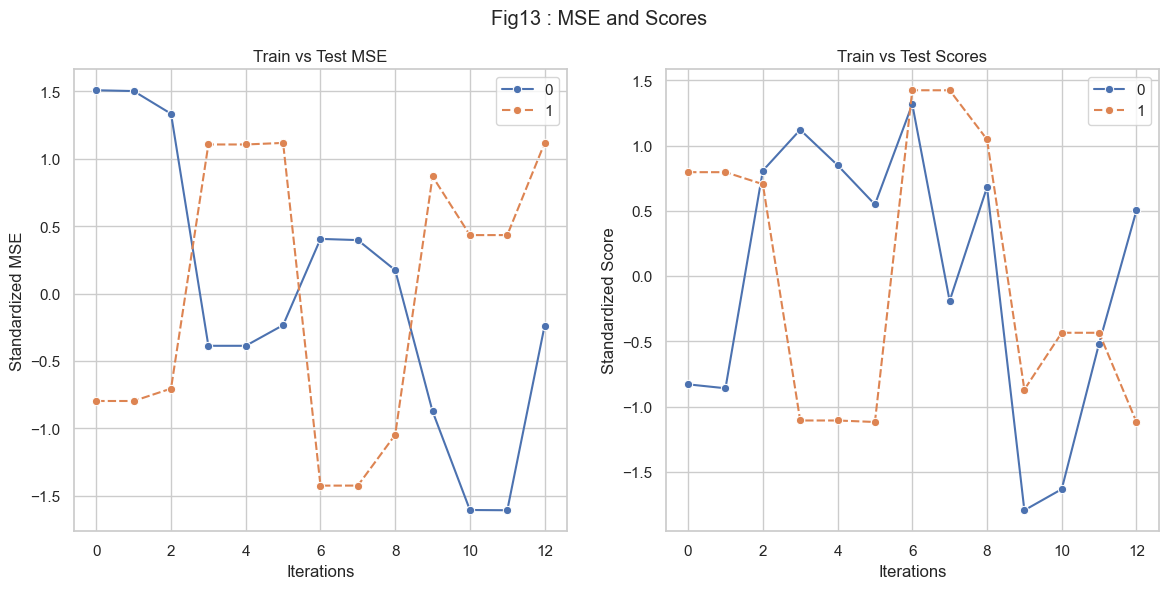

In [88]:
### Lets plot the MSE to choose the best model
#### For plotting removing row 0 form results data, since MSE is too high and it does not show variance in test results
resulting_df = results_df.drop(axis=0, index=0).reset_index()

fig, axs = plt.subplots(1, 2)
fig.set_figheight(6)
fig.set_figwidth(14)
sns.set_theme(style="whitegrid")
sns.lineplot(StandardScaler().fit_transform(resulting_df[['test_mse','train_mse']]), markers='o', ax=axs[0])
axs[0].set_xlabel('Iterations')
axs[0].set_ylabel('Standardized MSE')
axs[0].set_title('Train vs Test MSE')
#plt.legend(labels=["A", "B"])
sns.lineplot(StandardScaler().fit_transform(resulting_df[['test_score','train_score']]), markers='o',ax=axs[1])
axs[1].set_xlabel('Iterations')
axs[1].set_ylabel('Standardized Score')
axs[1].set_title('Train vs Test Scores')
title, figcounter = cf.getFigTitle(figcounter,'MSE and Scores')
fig.suptitle(title)
fig.savefig(images_path+title)
fig.show()



In [89]:
## The lowest MSE was for iteration 10 -'poly-afs-bwd-d2-stratkf'
# Let's reun and get coeficients and selected feature and importance

pfs.set_params(transformer__poly__degree=poly_degree)
pfs.set_params(selector__direction='backward')
pipeline_proces_and_holdout(pfs, f'poly-afs-bwd-d{poly_degree}')

pcoefs_arr = []
pcoefs_arr.append(pfs.named_steps['model'].coef_)
dump_feature_imp(pfs)

==================== RUNNING poly-afs-bwd-d2=================================
..Running KFold CV
..Running StratifiedKFold CV
..Running ShuffleSplit CV
{'model': 'poly-afs-bwd-d2-ss', 'train_mse': 89248804683.111, 'test_mse': 209358167.90398, 'train_score': 0.0005456431649543125, 'test_score': 0.16325558560622455, 'scorer': 'ss'}
[ 2239.37955849 -2563.08552531   960.90901191  -816.78058808
 -4182.68349659  4324.13034411  3429.51559765]
==================== DONE =================================================
year                0.155  +/- 0.002
fuel                0.057  +/- 0.001
odometer            0.032  +/- 0.001
manufacturer        0.026  +/- 0.001
transmission        0.007  +/- 0.000
title_status        0.006  +/- 0.000


In [90]:
all_cols = selected_columns_list(pfs.named_steps['transformer'].get_feature_names_out(), pfs.named_steps['selector'].get_support())
pcoeff_df = pd.DataFrame(pcoefs_arr, columns=all_cols,index=['coefficents']).T
pcoeff_df

,coefficents
cat__manufacturer,2239.379558
cat__fuel,-2563.085525
cat__title_status,960.909012
cat__transmission,-816.780588
poly__odometer,-4182.683497
poly__year^2,4324.130344
poly__odometer^2,3429.515598


In [91]:
plot_coefs_df = pcoeff_df.reset_index()
plot_coefs_df = plot_coefs_df.rename({'index':'feature'}, axis='columns')
plot_coefs_df['abs_coef'] = plot_coefs_df['coefficents'].apply(lambda x: abs(x))
plot_coefs_df['colors'] = plot_coefs_df['coefficents'].apply(lambda x: "green" if x > 0 else "red")
plot_coefs_df = plot_coefs_df.sort_values("abs_coef", ascending=False).reset_index()
plot_coefs_df

,index,feature,coefficents,abs_coef,colors
0,5,poly__year^2,4324.130344,4324.130344,green
1,4,poly__odometer,-4182.683497,4182.683497,red
2,6,poly__odometer^2,3429.515598,3429.515598,green
3,1,cat__fuel,-2563.085525,2563.085525,red
4,0,cat__manufacturer,2239.379558,2239.379558,green
5,2,cat__title_status,960.909012,960.909012,green
6,3,cat__transmission,-816.780588,816.780588,red


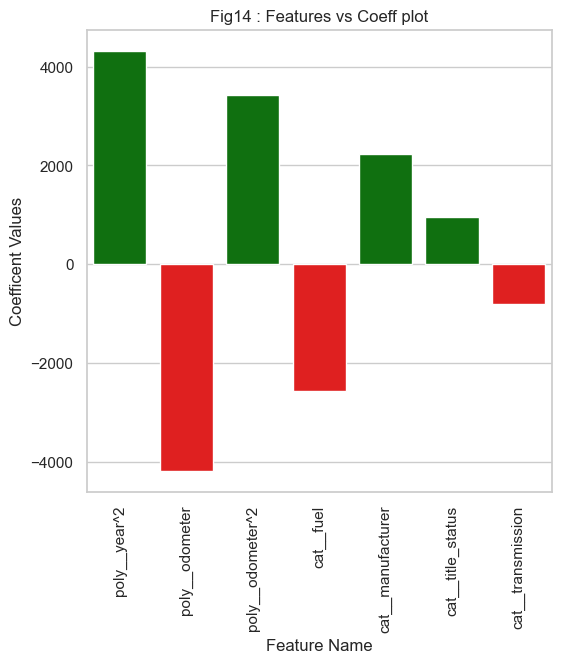

In [92]:
# Plot coef
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
sns.barplot(x='feature',
            y='coefficents',
            data=plot_coefs_df, palette=np.array(plot_coefs_df['colors']))
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
title, figcounter = cf.getFigTitle(figcounter,'Features vs Coeff plot')
ax.set_title(title)
ax.set_ylabel('Coefficent Values')
ax.set_xlabel('Feature Name')
fig.savefig(images_path+title)
fig.show()


### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

### Findings
- Sales have been growing at a steady pace since 2000.
- 2017/2018 were are best year for sales where we sold in excess of 35K cars in our dealership, since then car sales have declined.
- During best years the dealership was selling lot of newer cars/low mileage and high price.
- Buyers are also looking for alternative fuel types other than gas - hybrid/electric
- Cars buyers also look at the manufacturer of cars
    - Japanese makers Toyota/Honda/Nissan are big sellers, since they provide multiple fuel type options of electric/hybrid combinations
    - Among american makers - Ford/Chevy are most wanted   

### So key takeaway, to make more money let's sell cars which are expensive and these factors makes cars more expensive(in order)

1. Newer model cars
2. Alternate fuel type
    - Electric/Hybrid 
3. Low Mileage
4. Right manufacturers
    - The big three Japs(Toyota/Honda/Nissan), lets stick with 
        -  Sedan's
    - and American(Ford/Chevy/GMC)
        - Trucks/Pickup's
5. Transmission     
    - Newer/Other types of transmission types are high seller 
6. Clean title     
 
So Lets refresh our parking lots and make more money ... GO TEAM!!!!